<a href="https://colab.research.google.com/github/pbhuch/GL_DecA_G4_NLP1/blob/main/GL_DecA_G4_NLP1_Final_dec4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Great Learning : AIML Online Capstone -AUTOMATIC TICKET ASSIGNMENT

DecA : Group 4: NLP 1

Group Members :

1. Priya Moily
2. Priyanka Gupta
3. Avinash Balani
4. Priyank Bhuch

Importing relavant Libraries

In [1]:
!pip install ftfy
from time import time
from PIL import Image
from zipfile import ZipFile
import os, sys, itertools, re
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
import sklearn.neighbors._base

import imblearn
from imblearn.over_sampling import SMOTE

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D, Reshape, Embedding, LSTM,  TimeDistributed, Bidirectional, Lambda, Input, Add, GlobalMaxPool1D
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
#import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# to define loss
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

from itertools import islice

import re
import nltk
from nltk.corpus import stopwords

from ftfy import fix_encoding, fix_text, badness
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.utils import resample

import pickle, string

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import spacy

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

SEED = 123                 # to be able to rerun the same NN
np.random.seed(SEED)
tf.random.set_seed(SEED)

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

! pip install langdetect
from langdetect import detect
from langdetect import detect
!pip install goslate
from goslate import Goslate
!pip install spacy
from collections import defaultdict
from bs4 import BeautifulSoup
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from gensim.models import Word2Vec

# spacy for lemmatization
import spacy

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=b7f17eda0140ed2fa6bd3b135031960507657d6dc2d1a2b886fcb93ec58391b9
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy


     |████████████████████████████████| 981 kB 5.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=c8797985c4315db3be53dc313c0103bc554a0a95d6ac6d904846c22fe141c0ed
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
  Created wheel for goslate: filename=goslate-1.5.2-py3-none-any.whl size=11436 sha256=c1186b5b34bd08d0140320db18cca1ad741a9ad99bfa24fd350e4ad40fa867f8
  Stored in directory: /root/.cache/pip/wheels/a8/8a/c4/85425eac5e0746fd5fc898801858331e55ac386f476d65e58d
Successfully built goslate


In [ ]:
dataset = pd.read_excel('/content/sample_data/input_data.xlsx')
dataset.shape

(8500, 4)

In [ ]:
dataset.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [ ]:
dataset[pd.isnull(dataset).any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [ ]:
dataset.fillna(str(), inplace=True)
dataset.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [ ]:
duplicate = dataset[dataset.duplicated()]

In [ ]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 51 to 8405
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  83 non-null     object
 1   Description        83 non-null     object
 2   Caller             83 non-null     object
 3   Assignment group   83 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB


In [ ]:
dataset1 = dataset[~dataset.duplicated()]

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8417 non-null   object
 1   Description        8417 non-null   object
 2   Caller             8417 non-null   object
 3   Assignment group   8417 non-null   object
dtypes: object(4)
memory usage: 328.8+ KB


In [ ]:
dataset1.head(20)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0


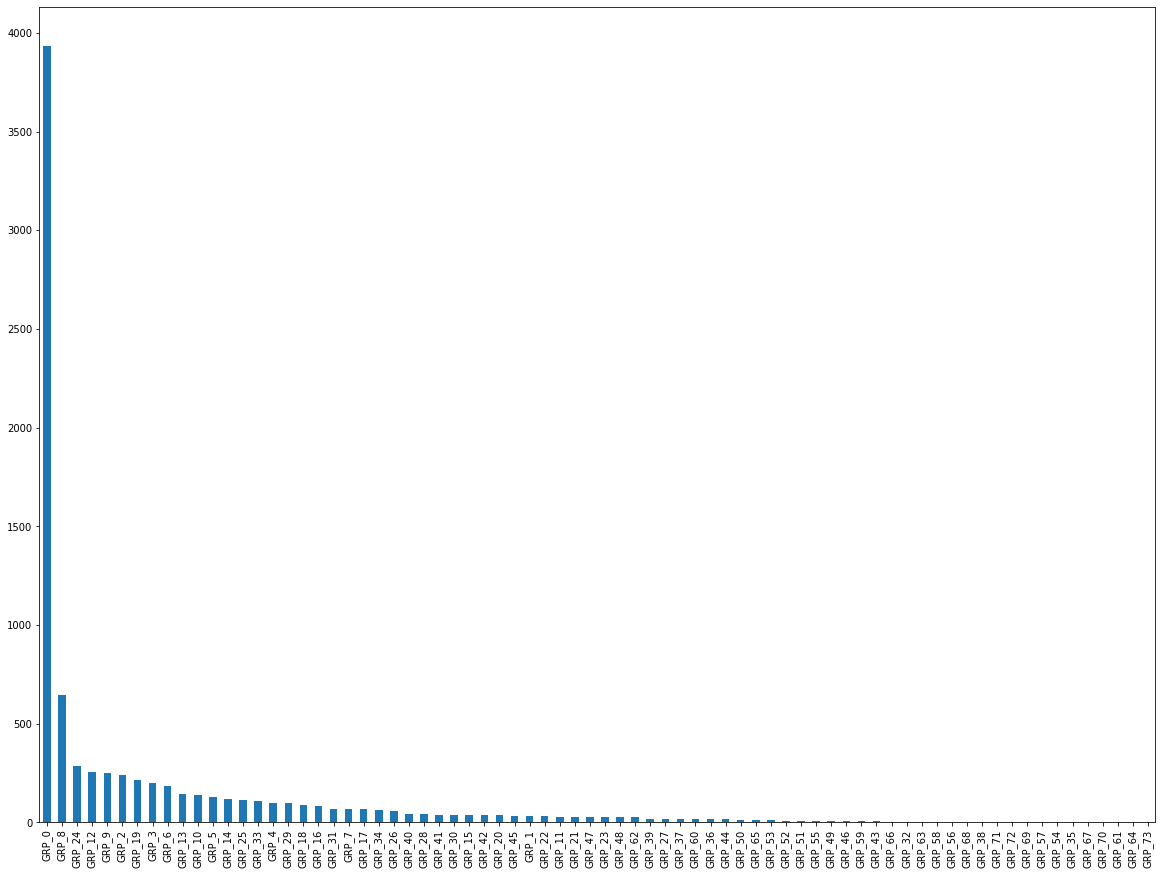

In [ ]:
plt.figure(figsize=(20,15))
dataset1['Assignment group'].value_counts().plot(kind='bar')

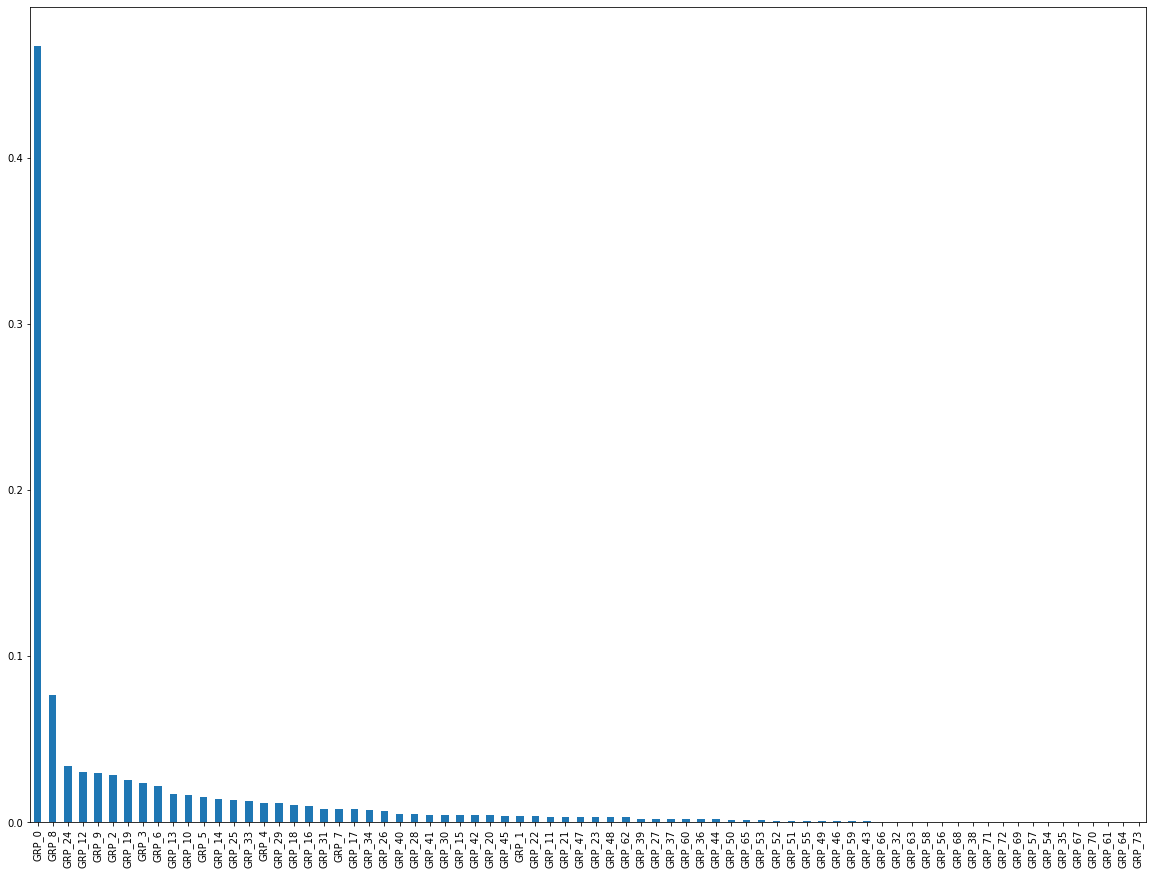

In [ ]:
plt.figure(figsize=(20,15))
dataset1['Assignment group'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
display(dataset1['Assignment group'].value_counts(normalize=True))

GRP_0     0.467387
GRP_8     0.076631
GRP_24    0.033860
GRP_12    0.030533
GRP_9     0.029939
GRP_2     0.028633
GRP_19    0.025544
GRP_3     0.023761
GRP_6     0.021742
GRP_13    0.017227
GRP_10    0.016633
GRP_5     0.015207
GRP_14    0.014019
GRP_25    0.013782
GRP_33    0.012712
GRP_4     0.011881
GRP_29    0.011524
GRP_18    0.010455
GRP_16    0.010099
GRP_31    0.008198
GRP_7     0.008079
GRP_17    0.008079
GRP_34    0.007366
GRP_26    0.006653
GRP_40    0.005346
GRP_28    0.005228
GRP_41    0.004752
GRP_30    0.004633
GRP_15    0.004515
GRP_42    0.004396
GRP_20    0.004277
GRP_45    0.004158
GRP_1     0.003683
GRP_22    0.003683
GRP_11    0.003564
GRP_21    0.003327
GRP_47    0.003208
GRP_23    0.002970
GRP_48    0.002970
GRP_62    0.002970
GRP_39    0.002257
GRP_27    0.002139
GRP_37    0.001901
GRP_60    0.001901
GRP_36    0.001782
GRP_44    0.001782
GRP_50    0.001663
GRP_65    0.001307
GRP_53    0.001307
GRP_52    0.001069
GRP_51    0.000950
GRP_55    0.000950
GRP_49    0.

In [ ]:
# Top 5 callers in each assignment group
top_n = 5
df_sample2 = dataset1['Caller'].groupby(dataset1['Assignment group']).value_counts()
caller_grp = pd.DataFrame(df_sample2.groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True))
caller_grp.head(15)

Caller
Assignment group Caller                   
GRP_0            fumkcsji sarmtlhy     126
                 rbozivdq gmlhrtvp      71
                 olckhmvx pcqobjnd      47
                 efbwiadp dicafxhv      45
                 mfeyouli ndobtzpw      13
GRP_1            bpctwhsn kzqsbmtp       6
                 jloygrwh acvztedi       4
                 jyoqwxhz clhxsoqy       3
                 spxqmiry zpwgoqju       3
                 kbnfxpsy gehxzayq       2
GRP_10           bpctwhsn kzqsbmtp      60
                 ihfkwzjd erbxoyqk       6
                 dizquolf hlykecxa       5
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3

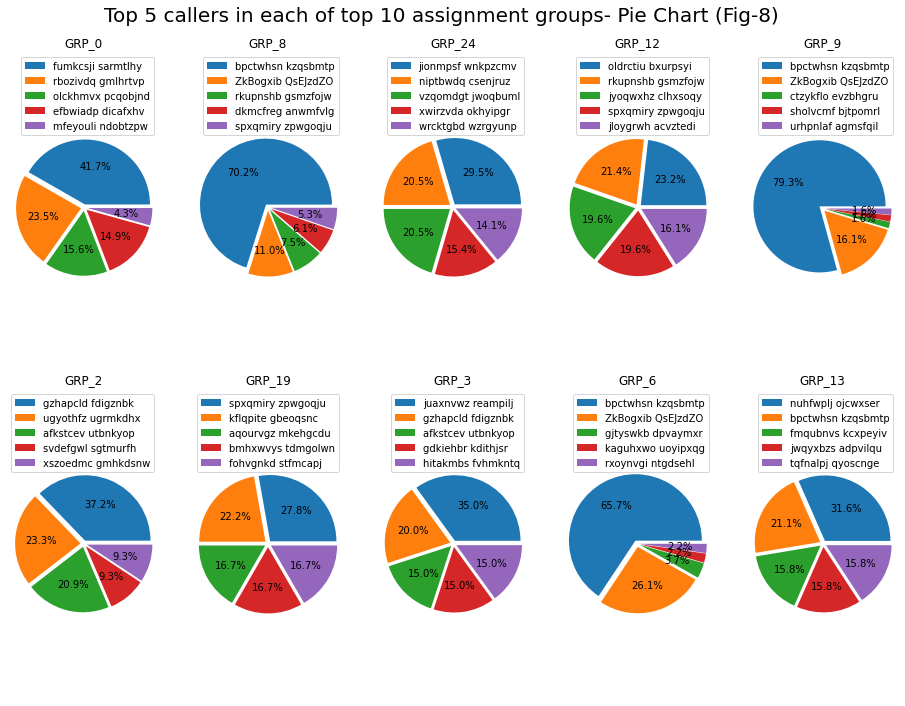

In [ ]:
# Visualize Top 5 callers in each of top 10 assignment groups
top_n = 10
df_sample3 = pd.DataFrame(dataset1.groupby('Assignment group').size(),columns = ['Count']).reset_index()
top_grps = df_sample3.nlargest(top_n, 'Count')['Assignment group'].tolist()

fig_cols = 5
fig_rows = int(np.ceil(top_n/fig_cols))
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(13,9.5))
fig.suptitle('Top 5 callers in each of top 10 assignment groups- Pie Chart (Fig-8)', y=1, va= 'bottom', size='20')
for row in range(fig_rows):
    for col in range(fig_cols):
        grp_n = fig_cols * row + col
        if grp_n < top_n:
            xs = caller_grp.xs(top_grps[grp_n])
            _ = axes[row,col].pie(xs, autopct='%1.1f%%', explode=[0.05]*5)
            axes[row,col].legend(labels=xs.index,loc="best")
            axes[row,col].axis('equal')
            axes[row,col].set_title(top_grps[grp_n])

plt.tight_layout()

In [ ]:
# Write a function to apply to the dataset to detect Mojibakes
def is_mojibake_impacted(text):
    if not badness.sequence_weirdness(text):
        # nothing weird, should be okay
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        # Not CP-1252 encodable, probably fine
        return True
    else:
        # Encodable as CP-1252, Mojibake alert level high
        return False

In [ ]:
# Check the dataset for mojibake impact
dataset1[~dataset1.iloc[:,:].applymap(is_mojibake_impacted).all(1)]

,Short description,Description,Caller,Assignment group
99,password expiry tomorrow,\n\nreceived from: ecprjbod.litmjwsy@gmail.com...,ecprjbod litmjwsy,GRP_0
116,server issues,\r\n\r\nreceived from: bgqpotek.cuxakvml@gmail...,bgqpotek cuxakvml,GRP_0
124,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, octobe...",tvcdfqgp nrbcqwgj,GRP_0
162,access to bex,\r\n\r\nreceived from: yfqoaepn.xnezhsit@gmail...,yfqoaepn xnezhsit,GRP_0
164,æ’¤å›ž: ticket_no1564867 -- comments added,\n\nreceived from: abcdri@company.com\n\nwindy...,tycludks cjofwigv,GRP_0
170,[urgent!!] delivery note creation request!!,\n\nreceived from: fbvpcytz.nokypgvx@gmail.com...,fbvpcytz nokypgvx,GRP_18
177,unable to access password_management_tool id p...,i try to change now my password acc. to attach...,ijeqpkrz nwtehsyx,GRP_2
186,é’å²›å…´åˆæœºç”µshipment notificationé‚®ç®±è...,"from: \nsent: friday, october 28, 2016 7:20 a...",yafxlpwi lhxvatkb,GRP_18
222,support fÃ¼r fa.gstry \arexjftu ohxdwngl,support fÃ¼r fa.konnica \arexjftu ohxdwngl,arexjftu ohxdwngl,GRP_24
223,probleme mit bluescreen .,"hallo ,\n\nes ist erneut passiert. der pc hat ...",vrfpyjwi nzhvgqiw,GRP_24


In [ ]:
dataset1['Short description']=dataset1['Short description'].apply(fix_text)
dataset1['Description']=dataset1['Description'].apply(fix_text)

In [ ]:
dataset1.loc[7581]

Short description    vpn 不能登录,网页一直在检查防病毒软件。
Description          vpn 不能登录,网页一直在检查防病毒软件。
Caller                    eokwmfay ewbltgha
Assignment group                     GRP_31
Name: 7581, dtype: object

In [ ]:
def fn_lan_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'no'

In [ ]:
dataset1['Language'] = dataset1['Description'].apply(fn_lan_detect)

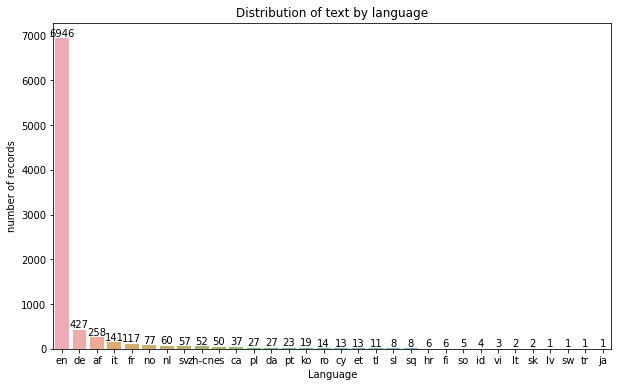

In [ ]:
x = dataset1["Language"].value_counts()
x=x.sort_values(ascending=False)
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

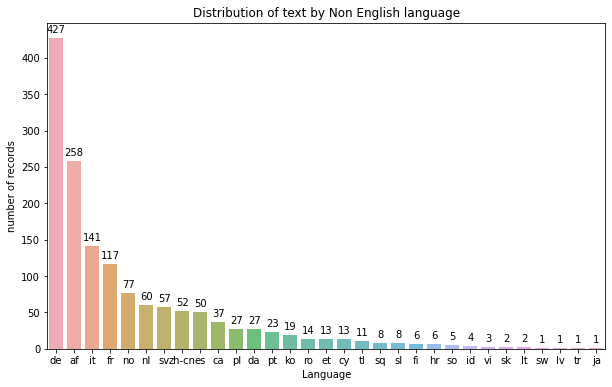

In [ ]:
dataset1_nonEnglish = pd.DataFrame(dataset1[dataset1["Language"]!='en'])

x = dataset1_nonEnglish["Language"].value_counts()
x=x.sort_values(ascending=False)
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by Non English language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [ ]:
dataset1['Language'].value_counts()

en       6946
de        427
af        258
it        141
fr        117
no         77
nl         60
sv         57
zh-cn      52
es         50
ca         37
pl         27
da         27
pt         23
ko         19
ro         14
cy         13
et         13
tl         11
sl          8
sq          8
hr          6
fi          6
so          5
id          4
vi          3
lt          2
sk          2
sw          1
tr          1
lv          1
ja          1
Name: Language, dtype: int64

In [ ]:
email_regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

In [ ]:
def fn_remove_irrelaventWords(df,columnName):
  for index in range(df.shape[0]):
    df[columnName][index] = df[columnName][index].lower()                                       # to lower case 
    df[columnName][index] = re.sub(email_regex,"",df.loc[index,columnName])                     # remove email address
    df[columnName][index] = re.sub(r'\S*@\S*\s?', '', df.loc[index,columnName])                 # remove email address with appended text
    df[columnName][index] = re.sub(r"received from:",' ',df.loc[index,columnName])              # remove unwanted text
    df[columnName][index] = re.sub(r"from:",' ',df.loc[index,columnName])                       # remove unwanted text
    df[columnName][index] = re.sub(r"to:",' ',df.loc[index,columnName])                         # remove unwanted text
    df[columnName][index] = re.sub(r"subject:",' ',df.loc[index,columnName])                    # remove unwanted text  
    df[columnName][index] = re.sub(r"sent:",' ',df.loc[index,columnName])                       # remove unwanted text
    df[columnName][index] = re.sub(r"ic:",' ',df.loc[index,columnName])                         # remove unwanted text
    df[columnName][index] = re.sub(r"cc:",' ',df.loc[index,columnName])                         # remove unwanted text
    df[columnName][index] = re.sub(r"bcc:",' ',df.loc[index,columnName])                        # remove unwanted text  
    df[columnName][index] = re.sub(r'\d+','' ,df.loc[index,columnName])                         # remove numbers
    df[columnName][index] = re.sub(r'\n',' ',df.loc[index,columnName])                          # remove new line character
    df[columnName][index] = re.sub(r'#','', df.loc[index,columnName])                           # remove hashtag while keeping hashtag text
    df[columnName][index] = re.sub(r'&;?', 'and',df.loc[index,columnName])                      # remove &
    df[columnName][index] = re.sub(r'\&\w*;', '', df.loc[index,columnName])                     # remove HTML special entities (e.g. &amp;)
    df[columnName][index] = re.sub(r'https?:\/\/.*\/\w*', '', df.loc[index,columnName])         # remove hyperlinks
    df[columnName][index] = re.sub(r"hello",' ',df.loc[index,columnName])                       # remove 'hello' word
    df[columnName][index] = re.sub(r"_",' ',df.loc[index,columnName])                           # remove _
    df[columnName][index] = re.sub(r"-",' ',df.loc[index,columnName])                           # remove -
    df[columnName][index] = re.sub(r",",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"\(",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"\)",' ',df.loc[index,columnName])
  return df

In [ ]:
df_clean = dataset1.reset_index()

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              8417 non-null   int64 
 1   Short description  8417 non-null   object
 2   Description        8417 non-null   object
 3   Caller             8417 non-null   object
 4   Assignment group   8417 non-null   object
 5   Language           8417 non-null   object
dtypes: int64(1), object(5)
memory usage: 394.7+ KB


In [ ]:
df_clean = fn_remove_irrelaventWords(df_clean,'Description')
df_clean = fn_remove_irrelaventWords(df_clean,'Short description')

In [ ]:
df_clean.tail(20)

,index,Short description,Description,Caller,Assignment group,Language
8397,8480,customer group enhanced field,a business decision has recently bee...,nlearzwi ukdzstwi,GRP_9,en
8398,8481,ess portal,hi team i was going into the ess file ...,eagvusbr nguqityl,GRP_9,en
8399,8482,robot hostname is inactive,robot hostname is inactive,rkupnshb gsmzfojw,GRP_8,en
8400,8483,fw: case id [ref: case :ref] :: others,pacvbetl yptglhoe thursday august : p...,pacvbetl yptglhoe,GRP_0,en
8401,8484,please remove user hugcadrn ixhlwdgt ralfteim...,please remove user hugcadrn ixhlwdgt ralfteim...,hugcadrn ixhlwdgt,GRP_2,en
8402,8485,ticket update on inc to user hbmwlprq ilfvyodx,ticket update on inc to user hbmwlprq ilfvyodx,fumkcsji sarmtlhy,GRP_0,en
8403,8486,ticket update on ticket no,ticket update on ticket no,fumkcsji sarmtlhy,GRP_0,sv
8404,8487,telephony software is missing from pc,pc received multiple windows security updates ...,pvbomqht smfkuhwi,GRP_3,en
8405,8488,erp account unlock,name:mfeyouli ndobtzpw language: browser:micro...,rbozivdq gmlhrtvp,GRP_0,en
8406,8489,account locked,account locked,sdvlxbfe ptnahjkw,GRP_0,en


In [ ]:
df_clean = df_clean.drop(columns=['index'],axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8417 non-null   object
 1   Description        8417 non-null   object
 2   Caller             8417 non-null   object
 3   Assignment group   8417 non-null   object
 4   Language           8417 non-null   object
dtypes: object(5)
memory usage: 328.9+ KB


In [ ]:
def fn_removeCaller(df,columnName):
  for index in range(df.shape[0]):
    if (df['Caller'][index] in df[columnName][index]):
      df[columnName][index] = df[columnName][index].replace(df['Caller'][index],"person")
    if (df['Caller'][index].replace(" ","") in df[columnName][index]):
      df[columnName][index] = df[columnName][index].replace(df['Caller'][index].replace(" ",""),"person")
  return df

In [ ]:
df_clean = fn_removeCaller(df_clean,'Description')
df_clean = fn_removeCaller(df_clean,'Short description')

In [ ]:
df_clean.tail(10)

,Short description,Description,Caller,Assignment group,Language
8407,check status in purchasing,please contact ed pasgryowski pasgryo about ...,mpihysnw wrctgoan,GRP_29,en
8408,vpn for laptop,i need a vpn for my new laptop. name llv...,jxgobwrm qkugdipo,GRP_34,en
8409,hr tool etime option not visitble,hr tool etime option not visitble,tmopbken ibzougsd,GRP_0,en
8410,erp fi ob two accounts to be added,i am sorry i have another two accounts that n...,ipwjorsc uboapexr,GRP_10,en
8411,tablet needs reimaged due to multiple issues w...,tablet needs reimaged due to multiple issues w...,cpmaidhj elbaqmtp,GRP_3,en
8412,emails not coming in from zz mail,good afternoon i am not receiving the e...,avglmrts vhqmtiua,GRP_29,en
8413,telephony software issue,telephony software issue,rbozivdq gmlhrtvp,GRP_0,en
8414,vip: windows password reset for tifpdchb pedxruyf,vip: windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,GRP_0,en
8415,machine não está funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,en
8416,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,de


In [ ]:
df_clean.to_excel("df_clean_LangDetected.xlsx")


Using the GoSlate Library, we have Translated all the languages to English and verified it using Google Translator

Directly importing the Translated dataset

In [ ]:
#svc_domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
#svc_urls = ['http://translate.google' + domain for domain in svc_domains]

In [ ]:
#gs = Goslate(service_urls=svc_urls)
#trans_8416 = gs.translate(df_clean['Description'][8416], target_language='en', source_language='auto')

In [ ]:
#print ('Original Text : ',df_clean['Description'][8416])
#print('Traslated to English : ',trans_8416)

In [ ]:
#def fn_ConvertToEnglish(df,columnName):
#  for idx in range(df.shape[0]):
#    row_iter = gs.translate(df[columnName][idx],target_language='en',source_language = 'auto')
#    df[columnName][idx] = str(row_iter)
#  return df

In [ ]:
#df_lang = fn_ConvertToEnglish(df_clean,'Description')
#df_lang = fn_ConvertToEnglish(df_clean,'Short description')

In [ ]:
#df_lang.to_excel("df_clean_LangDetected_Translated.xlsx")

In [ ]:
df_lang = pd.read_excel("/content/df_clean_LangDetected_Translated.xlsx")

In [ ]:
df_lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         8417 non-null   int64 
 1   Short description  8417 non-null   object
 2   Description        8417 non-null   object
 3   Caller             8417 non-null   object
 4   Assignment group   8417 non-null   object
 5   Language           8417 non-null   object
dtypes: int64(1), object(5)
memory usage: 394.7+ KB


In [ ]:
df_lang = df_lang.drop(columns=['Unnamed: 0'],axis=1)

In [ ]:
df_lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8417 non-null   object
 1   Description        8417 non-null   object
 2   Caller             8417 non-null   object
 3   Assignment group   8417 non-null   object
 4   Language           8417 non-null   object
dtypes: object(5)
memory usage: 328.9+ KB


In [ ]:
df_lang[pd.isnull(df_lang).any(axis=1)]

,Short description,Description,Caller,Assignment group,Language


In [ ]:
df_lang.fillna(str(), inplace=True)
df_lang.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
Language             0
dtype: int64

In [ ]:
df_lang.insert(loc=4, 
              column='combined_description', 
              allow_duplicates=True, 
              value=list(df_lang['Short description'].str.strip() + ' ' + df_lang['Description'].str.strip()))

In [ ]:
df_lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     8417 non-null   object
 1   Description           8417 non-null   object
 2   Caller                8417 non-null   object
 3   Assignment group      8417 non-null   object
 4   combined_description  8417 non-null   object
 5   Language              8417 non-null   object
dtypes: object(6)
memory usage: 394.7+ KB


In [ ]:
df_lang.head()

,Short description,Description,Caller,Assignment group,combined_description,Language
0,login issue,verified user details. employee and manager na...,spxjnwir pjlcoqds,GRP_0,login issue verified user details. employee an...,en
1,outlook,team my meetings/skype meetings etc are not ap...,hmjdrvpb komuaywn,GRP_0,outlook team my meetings/skype meetings etc ar...,en
2,cant log in to vpn,hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,cant log in to vpn hi i cannot log on to vpn best,en
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page unable to access...,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,no


In [ ]:
def fn_remove_irrelaventWords_LevelTwo(df,columnName):
  for index in range(df.shape[0]):
    df[columnName][index] = df[columnName][index].lower()                                       # to lower case 
    df[columnName][index] = df[columnName][index].replace("// ::",' ')
    df[columnName][index] = df[columnName][index].replace("<",' ')
    df[columnName][index] = df[columnName][index].replace(">",' ')
    df[columnName][index] = df[columnName][index].replace(";",' ')
    df[columnName][index] = df[columnName][index].replace(".",' ')
    df[columnName][index] = df[columnName][index].replace("•",' ')
    df[columnName][index] = df[columnName][index].replace("?",' ')
    df[columnName][index] = df[columnName][index].replace("\\",' ')
    df[columnName][index] = df[columnName][index].replace("\/",' ')
    df[columnName][index] = df[columnName][index].replace(":",' ',)
    df[columnName][index] = df[columnName][index].replace("%",' ',)
    df[columnName][index] = df[columnName][index].replace("=",' ',)
    df[columnName][index] = df[columnName][index].replace("[mail ]",' ')
    df[columnName][index] = df[columnName][index].replace("[",' ')
    df[columnName][index] = df[columnName][index].replace("]",' ')
    df[columnName][index] = df[columnName][index].replace("< mail >",' ')
    df[columnName][index] = df[columnName][index].replace("+",' ')
    df[columnName][index] = df[columnName][index].replace("\"",' ')
  return df

In [ ]:
df_lang_clean = fn_remove_irrelaventWords_LevelTwo(df_lang,"combined_description")

In [ ]:
df_lang_clean.head(20)

,Short description,Description,Caller,Assignment group,combined_description,Language
0,login issue,verified user details. employee and manager na...,spxjnwir pjlcoqds,GRP_0,login issue verified user details employee an...,en
1,outlook,team my meetings/skype meetings etc are not ap...,hmjdrvpb komuaywn,GRP_0,outlook team my meetings/skype meetings etc ar...,en
2,cant log in to vpn,hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,cant log in to vpn hi i cannot log on to vpn best,en
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page unable to access...,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,no
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...,en
6,event: critical:hostname .company.com the valu...,event: critical:hostname .company.com the valu...,jyoqwxhz clhxsoqy,GRP_1,event critical hostname company com the valu...,en
7,ticket no employment status new non employee [...,ticket no employment status new non employee [...,eqzibjhw ymebpoih,GRP_0,ticket no employment status new non employee ...,en
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook unable to...,en
9,ticket update on inplant,ticket update on inplant,fumkcsji sarmtlhy,GRP_0,ticket update on inplant ticket update on inplant,en


In [ ]:
df_lang_clean.to_excel("df_Moji_langDet_Translated_clean_combinedDesc.xlsx")

Deterministic Rules

In [ ]:
def deterministicRules(df,columnName):
  for i in range(df.shape[0]):
      #1 Contains telephony_software > GRP_7
    if pd.notna(df[columnName][i]):
      if ('telephony software' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_7'
      #2 contains cutview >  GRP_66
      elif ('cutview' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_66'
      #3 contains engg application >  GRP_58
      elif ('engg application' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_58'
      #4 contains ethics >  GRP_23
      elif ('ethics' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_23'
      # contains crm dynamics >  GRP_22
      elif ('crm dynamics' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_22'
      # contains distributor tool & company center >  GRP_21
      elif ('distributor tool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_21'
      elif ('company center' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_21'
      # contains bpctwhsn kzqsbmtp & network outage or circuit outage >  GRP_8
      elif ((df['Caller'][i] == 'bpctwhsn kzqsbmtp' and ('network outage' in df[columnName][i]) or 'circuit outage' in df[columnName][i])):
        df['pred_group'][i] = 'GRP_8'
      elif ('reset passwords' in df[columnName][i] and 'the' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_17'
      elif (df[columnName][i].startswith('erp access issue')):
        df['pred_group'][i] = 'GRP_2'
      elif ('vsphere' in df[columnName][i] or 'esxi' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_12'
      elif ('windows account' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('erp sid account lock' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('erp sid password reset' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif(df['Caller'][i] == 'jionmpsf wnkpzcmv' and 'eutool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_24'
      elif(df['Caller'][i] == 'cwrikael oanmsecr' and 'eutool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('sso portal' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_73'
      elif ('unable complete forecast' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_67'
      elif (df[columnName][i].startswith('timecard') or df[columnName][i].startswith('time card')):
        df['pred_group'][i] = 'GRP_36'

In [ ]:
df_lang_clean.insert(loc=5,column='pred_group',value=np.nan,allow_duplicates=True)

In [ ]:
df_lang_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     8417 non-null   object 
 1   Description           8417 non-null   object 
 2   Caller                8417 non-null   object 
 3   Assignment group      8417 non-null   object 
 4   combined_description  8417 non-null   object 
 5   pred_group            0 non-null      float64
 6   Language              8417 non-null   object 
dtypes: float64(1), object(6)
memory usage: 460.4+ KB


In [ ]:
deterministicRules(df_lang_clean,"combined_description")
df_determinted = df_lang_clean[~df_lang_clean['pred_group'].isna()]

In [ ]:
df_determinted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 18 to 8413
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     557 non-null    object
 1   Description           557 non-null    object
 2   Caller                557 non-null    object
 3   Assignment group      557 non-null    object
 4   combined_description  557 non-null    object
 5   pred_group            557 non-null    object
 6   Language              557 non-null    object
dtypes: object(7)
memory usage: 34.8+ KB


In [ ]:
df_determinted.head()

,Short description,Description,Caller,Assignment group,combined_description,pred_group,Language
18,erp sid account locked,erp sid account locked,nqdyowsm yqerwtna,GRP_0,erp sid account locked erp sid account locked,GRP_0,en
25,erp sid password reset,erp sid password reset,jqhtkfsm xoehtbnl,GRP_0,erp sid password reset erp sid password reset,GRP_0,af
49,status does not change on telephony software,"when closing a call the agent keeps on the ""on...",aofnvyzt eqiyskhm,GRP_7,status does not change on telephony software w...,GRP_7,en
80,erp sid account locked,erp sid account locked,ilvortuq zfgrlewm,GRP_0,erp sid account locked erp sid account locked,GRP_0,en
154,reset passwords for person using password mana...,"employee is getting an error ""user authenticat...",hckvpary emxbpkwy,GRP_17,reset passwords for person using password mana...,GRP_17,en


In [ ]:
df_NonDet = df_lang_clean[df_lang_clean['pred_group'].isna()]

In [ ]:
df_NonDet = df_NonDet.reset_index()
df_NonDet = df_NonDet.drop(columns=['index'],axis=1)
df_NonDet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     7860 non-null   object
 1   Description           7860 non-null   object
 2   Caller                7860 non-null   object
 3   Assignment group      7860 non-null   object
 4   combined_description  7860 non-null   object
 5   pred_group            0 non-null      object
 6   Language              7860 non-null   object
dtypes: object(7)
memory usage: 430.0+ KB


We have Group till GRP_72. Now assigning GRP_99 to all merged groups having count <=10



In [ ]:
df_NonDet.insert(loc=4,column='New Assignment Group',value=np.nan,allow_duplicates=True)

In [ ]:
groupsToBeMerged = pd.DataFrame(df_NonDet['Assignment group'].value_counts() <=10)
groupsToBeMerged = groupsToBeMerged[groupsToBeMerged['Assignment group'] == True]
groupsToBeMergedList = list(groupsToBeMerged.index)
groupsToBeMergedList

['GRP_52',
 'GRP_55',
 'GRP_51',
 'GRP_49',
 'GRP_46',
 'GRP_59',
 'GRP_65',
 'GRP_43',
 'GRP_32',
 'GRP_63',
 'GRP_56',
 'GRP_68',
 'GRP_38',
 'GRP_71',
 'GRP_72',
 'GRP_69',
 'GRP_57',
 'GRP_54',
 'GRP_35',
 'GRP_23',
 'GRP_67',
 'GRP_70',
 'GRP_61',
 'GRP_58',
 'GRP_64',
 'GRP_66']

In [ ]:
len(groupsToBeMergedList)

26

In [ ]:
df_NonDet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     7860 non-null   object 
 1   Description           7860 non-null   object 
 2   Caller                7860 non-null   object 
 3   Assignment group      7860 non-null   object 
 4   New Assignment Group  0 non-null      float64
 5   combined_description  7860 non-null   object 
 6   pred_group            0 non-null      object 
 7   Language              7860 non-null   object 
dtypes: float64(1), object(7)
memory usage: 491.4+ KB


In [ ]:
for index in range(df_NonDet.shape[0]):
  if (df_NonDet['Assignment group'][index] in groupsToBeMergedList):
    df_NonDet['New Assignment Group'][index] = 'GRP_99'
  else:
    df_NonDet['New Assignment Group'][index] = df_NonDet['Assignment group'][index]

In [ ]:
df_NonDet.tail(30)

,Short description,Description,Caller,Assignment group,New Assignment Group,combined_description,pred_group,Language
7830,hi it help team please unblock my new company ...,Person Friday August: At NWFODMHC ExurcWKM WG:...,ntydihzo aeptfbgs,GRP_0,GRP_0,hi it help team please unblock my new company ...,NaN,en
7831,can you unblock my account so i can use outloo...,nwfodmhc exurcwkm friday august : am prishry b...,eqzibjhw ymebpoih,GRP_0,GRP_0,can you unblock my account so i can use outloo...,NaN,en
7832,plant value added services one day pick route ...,request to phase in additional vas customers. ...,xnqzhtwu hivumtfz,GRP_18,GRP_18,plant value added services one day pick route ...,NaN,en
7833,The computer can't open the computer,TO Xiaohe morning computer can't open,xqyjztnm onfusvlz,GRP_30,GRP_30,the computer can't open the computer to xiaohe...,NaN,zh-cn
7834,ticket update,rakthyesh ramdntythanjesh friday august : am u...,eqzibjhw ymebpoih,GRP_0,GRP_0,ticket update rakthyesh ramdntythanjesh friday...,NaN,en
7835,outlook freezing because of crm addin,outlook freezing because of crm addin,crjhotyk pxslorbe,GRP_0,GRP_0,outlook freezing because of crm addin outlook ...,NaN,en
7836,inquiry about employee shesyhur posrt,inquiry about employee shesyhur posrt,pvlxjizg xzvlwqjc,GRP_0,GRP_0,inquiry about employee shesyhur posrt inquiry ...,NaN,en
7837,etime time card update information.,etime time card update information.,tmopbken ibzougsd,GRP_0,GRP_0,etime time card update information etime time...,NaN,it
7838,supply chain software account unlock and passw...,supply chain software account unlock and passw...,xjyuobma pzgqixlj,GRP_0,GRP_0,supply chain software account unlock and passw...,NaN,en
7839,can't login to bex analyzer through vpn urgent,best,cfzsajbe lyejkdho,GRP_0,GRP_0,can't login to bex analyzer through vpn urgent...,NaN,en


In [ ]:
df_NonDet['New Assignment Group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_8',
       'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_18', 'GRP_19', 'GRP_2', 'GRP_20',
       'GRP_21', 'GRP_22', 'GRP_24', 'GRP_25', 'GRP_26', 'GRP_27',
       'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31', 'GRP_17', 'GRP_33',
       'GRP_34', 'GRP_99', 'GRP_36', 'GRP_37', 'GRP_39', 'GRP_40',
       'GRP_41', 'GRP_42', 'GRP_7', 'GRP_44', 'GRP_45', 'GRP_47',
       'GRP_48', 'GRP_50', 'GRP_53', 'GRP_60', 'GRP_62'], dtype=object)

In [ ]:
df_NonDet['New Assignment Group'].value_counts()

GRP_0     3660
GRP_8      591
GRP_24     285
GRP_9      252
GRP_12     251
GRP_19     213
GRP_2      209
GRP_3      197
GRP_6      182
GRP_13     143
GRP_10     139
GRP_5      128
GRP_14     116
GRP_25     115
GRP_33     103
GRP_29      97
GRP_4       95
GRP_99      88
GRP_18      88
GRP_16      84
GRP_31      67
GRP_34      62
GRP_26      55
GRP_28      44
GRP_41      40
GRP_40      40
GRP_30      39
GRP_42      37
GRP_15      36
GRP_45      35
GRP_20      33
GRP_1       31
GRP_11      30
GRP_47      27
GRP_22      27
GRP_48      25
GRP_62      25
GRP_7       21
GRP_17      19
GRP_39      19
GRP_27      17
GRP_60      16
GRP_44      15
GRP_37      15
GRP_50      14
GRP_21      13
GRP_36      11
GRP_53      11
Name: New Assignment Group, dtype: int64

In [ ]:
df_ML = df_NonDet.copy() # Creating copy 
df_DL = df_NonDet.copy()

In [ ]:
df_ML.shape, df_DL.shape

((7860, 8), (7860, 8))

In [ ]:
df_DL.to_excel("df_DL.xlsx")

Processing Data for ML Model

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords = set(stopwords.words('english'))
 # Remove stopwords
df_ML['combined_description'] = df_ML['combined_description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

In [ ]:
df_ML.head()

,Short description,Description,Caller,Assignment group,New Assignment Group,combined_description,pred_group,Language
0,login issue,verified user details. employee and manager na...,spxjnwir pjlcoqds,GRP_0,GRP_0,login issue verified user details employee man...,NaN,en
1,outlook,team my meetings/skype meetings etc are not ap...,hmjdrvpb komuaywn,GRP_0,GRP_0,outlook team meetings/skype meetings etc appea...,NaN,en
2,cant log in to vpn,hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,GRP_0,cant log vpn hi cannot log vpn best,NaN,en
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,GRP_0,unable access hr tool page unable access hr to...,NaN,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,GRP_0,skype error skype error,NaN,no


In [ ]:
#lemmatization
# Initialize spacy 'en' medium model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en', disable=['parser', 'ner'])

# Define a function to lemmatize the descriptions
def lemmatizer(sentence):
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])

In [ ]:
df_ML['combined_description'] = df_ML['combined_description'].apply(lemmatizer)

In [ ]:
df_ML.head(10)

,Short description,Description,Caller,Assignment group,New Assignment Group,combined_description,pred_group,Language
0,login issue,verified user details. employee and manager na...,spxjnwir pjlcoqds,GRP_0,GRP_0,login issue verify user detail employee manage...,NaN,en
1,outlook,team my meetings/skype meetings etc are not ap...,hmjdrvpb komuaywn,GRP_0,GRP_0,outlook team meeting / skype meeting etc appea...,NaN,en
2,cant log in to vpn,hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,GRP_0,can not log vpn hi can not log vpn best,NaN,en
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,GRP_0,unable access hr tool page unable access hr to...,NaN,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,GRP_0,skype error skype error,NaN,no
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,GRP_0,unable log engineering tool skype unable log e...,NaN,en
6,event: critical:hostname .company.com the valu...,event: critical:hostname .company.com the valu...,jyoqwxhz clhxsoqy,GRP_1,GRP_1,event critical hostname company com value moun...,NaN,en
7,ticket no employment status new non employee [...,ticket no employment status new non employee [...,eqzibjhw ymebpoih,GRP_0,GRP_0,ticket employment status new non employee ente...,NaN,en
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,GRP_0,unable disable add ins outlook unable disable ...,NaN,en
9,ticket update on inplant,ticket update on inplant,fumkcsji sarmtlhy,GRP_0,GRP_0,ticket update inplant ticket update inplant,NaN,en


In [ ]:
df_ML.to_excel("df_ML_StopWords_Lemmatized.xlsx")

Data Visualization

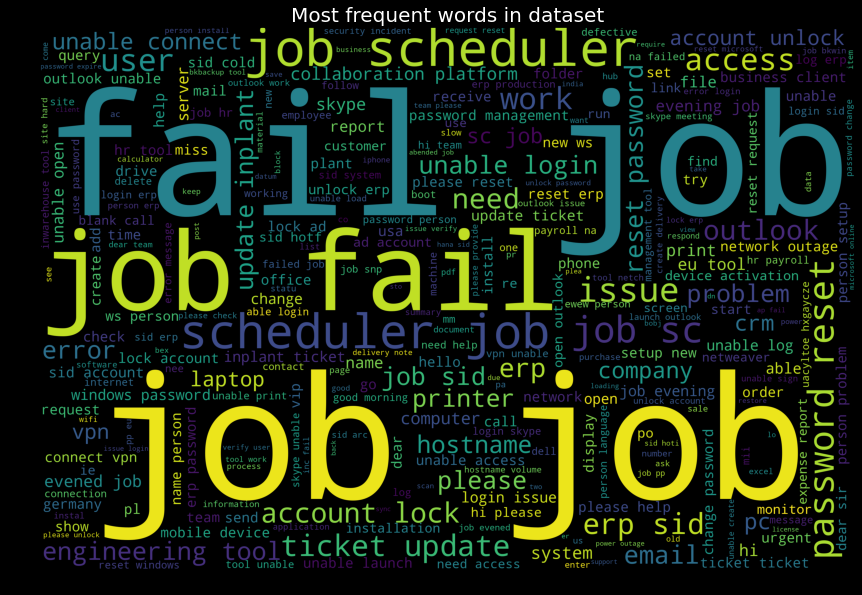

In [ ]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black')

# generate word cloud for data
wc_word=wc.generate(str(df_ML.combined_description))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

In [ ]:
#ngram function
def ngram_extractor(text, n_gram):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Function to generate a dataframe with n_gram and top max_row frequencies
def generate_ngrams(df, n_gram, max_row):
    temp_dict = defaultdict(int)
    for question in df:
        for word in ngram_extractor(question, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"]
    return temp_df

In [ ]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     7860 non-null   object
 1   Description           7860 non-null   object
 2   Caller                7860 non-null   object
 3   Assignment group      7860 non-null   object
 4   New Assignment Group  7860 non-null   object
 5   combined_description  7860 non-null   object
 6   pred_group            0 non-null      object
 7   Language              7860 non-null   object
dtypes: object(8)
memory usage: 491.4+ KB


In [ ]:
Ticket_desc = df_ML['combined_description']
#Define empty list
ticket_desc_cleaned = []
res = []
#Define for loop to iterate through the elements of the ticket_desc
for l in Ticket_desc:
    #Parse the contents of the cell
    soup = BeautifulSoup(l, 'html.parser')
    #Find all instances of the text within the </p> tag
    for el in soup.find_all('p'):
        res.append(el.get_text())
    #concatenate the strings from the list    
    endstring = ' '.join(map(str, res))
    #reset list
    res = []
    #Append the concatenated string to the main list
    ticket_desc_cleaned.append(endstring)

In [ ]:
ticket_desc_na_cleaned = [item.lower() for item in Ticket_desc]
#remove html links from list 
ticket_desc_na_cleaned =  [re.sub(r"http\S+", "", item) for item in ticket_desc_na_cleaned]
#remove special characters left
ticket_desc_na_cleaned = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", item) for item in ticket_desc_na_cleaned]

#convert to dataframe and rename the column of the ticket_desc_na_cleaned list
ticket_desc_clean = pd.DataFrame(np.array(ticket_desc_na_cleaned).reshape(-1))
ticket_desc_clean.columns = ["ans"]
#Squeeze dataframe to obtain series
desc_cleaned = ticket_desc_clean.squeeze()

In [ ]:
#generate unigram
ans_unigram = generate_ngrams(desc_cleaned, 1, 30)

In [ ]:
ans_unigram.head()

,word,wordcount
0,job,4987
1,please,2211
2,password,2207
3,scheduler,1888
4,erp,1796


In [ ]:
ans_unigram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   word       30 non-null     object
 1   wordcount  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


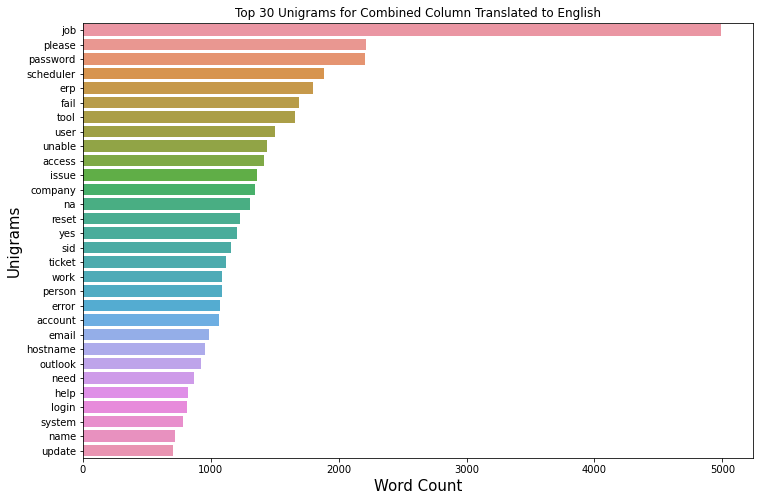

In [ ]:
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(ans_unigram["wordcount"],ans_unigram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Unigrams", fontsize=15)
plt.title("Top 30 Unigrams for Combined Column Translated to English")
plt.show()

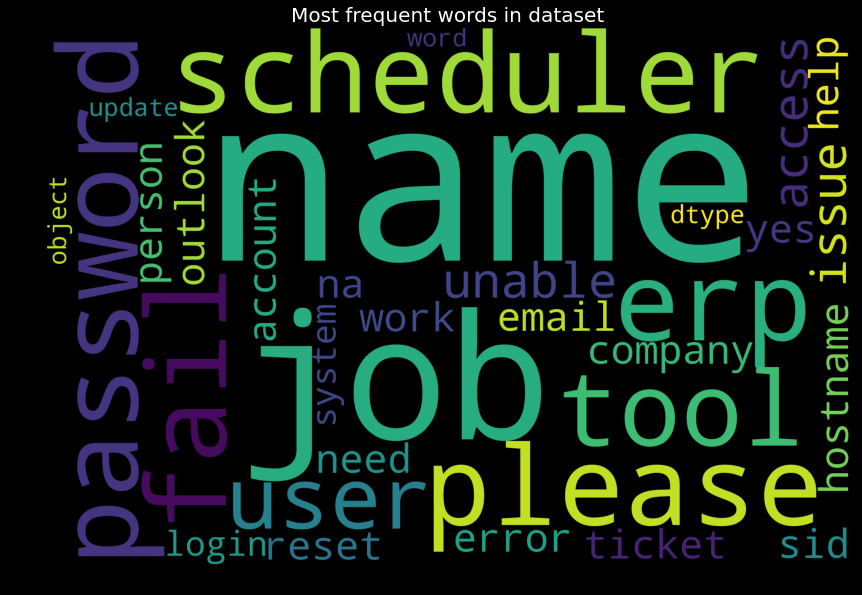

In [ ]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black')

# generate word cloud for data
#wc_word=wc.generate(str(ans_unigram))
wc_word=wc.generate(str(ans_unigram['word']))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

In [ ]:
#generate bigram
ans_bigram = generate_ngrams(desc_cleaned, 2, 20)

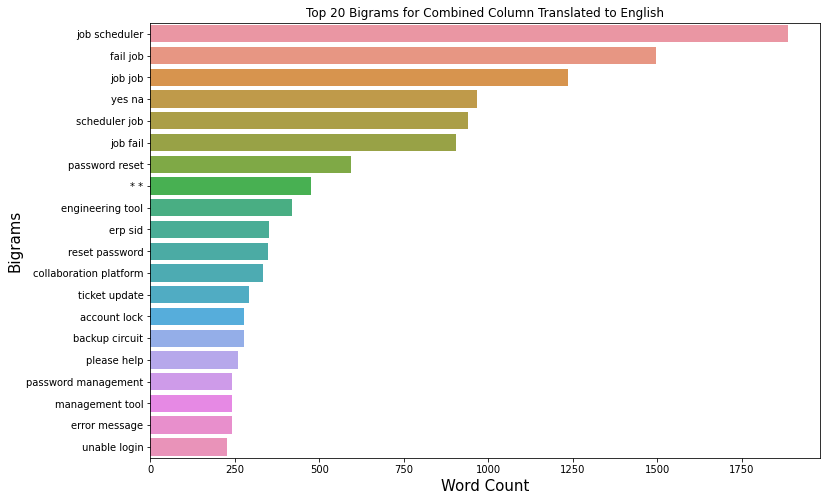

In [ ]:
#generate barplot for bigram
plt.figure(figsize=(12,8))
sns.barplot(ans_bigram["wordcount"],ans_bigram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Bigrams", fontsize=15)
plt.title("Top 20 Bigrams for Combined Column Translated to English")
plt.show()

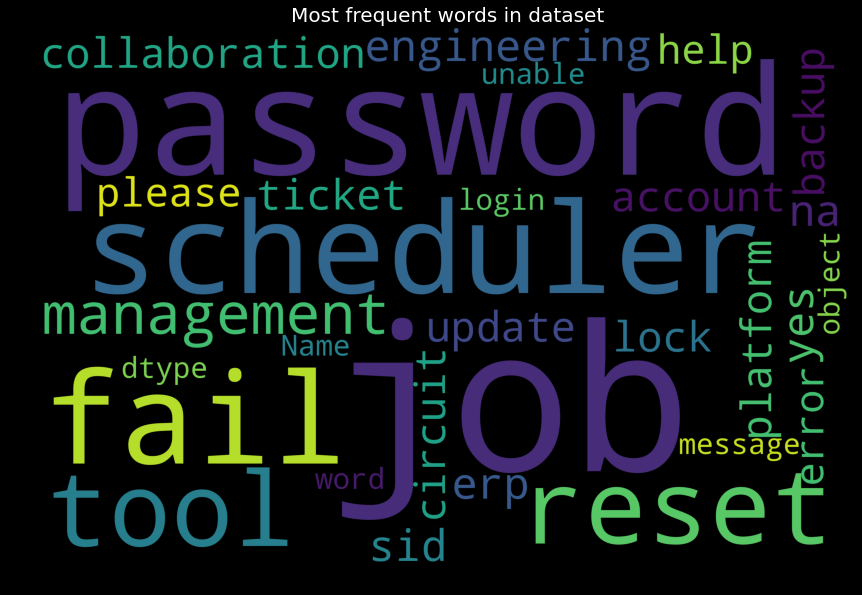

In [ ]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black')

# generate word cloud for data
wc_word=wc.generate(str(ans_bigram['word']))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

In [ ]:
#generate trigram
ans_trigram = generate_ngrams(desc_cleaned, 3, 20)

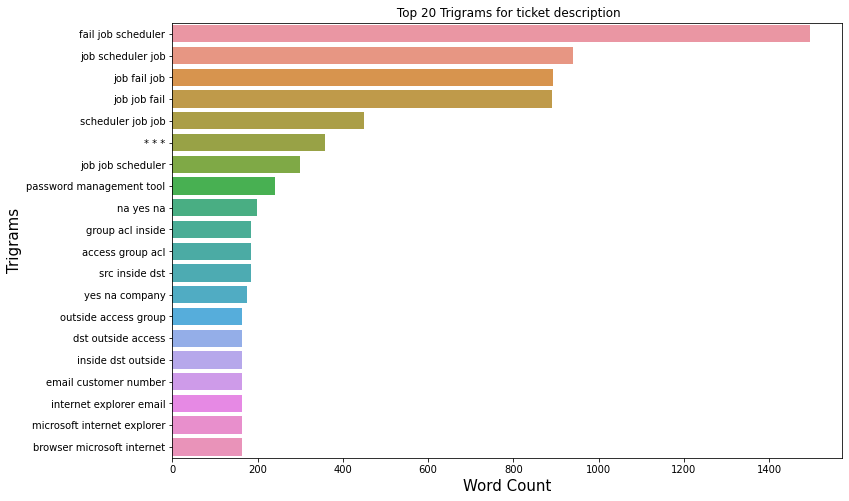

In [ ]:
#generate barplot for bigram
plt.figure(figsize=(12,8))
sns.barplot(ans_trigram["wordcount"],ans_trigram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Trigrams", fontsize=15)
plt.title(" Top 20 Trigrams for ticket description")
plt.show()

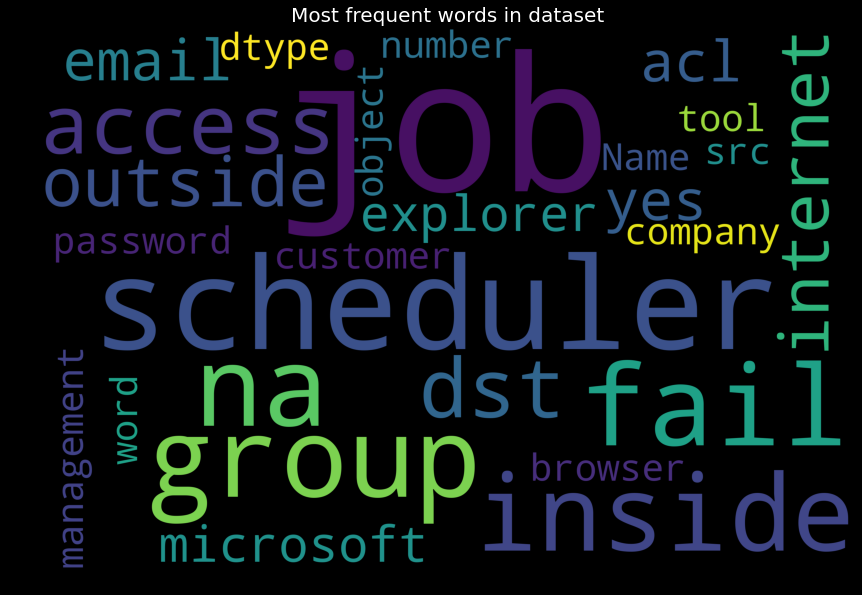

In [ ]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black')

# generate word cloud for data
wc_word=wc.generate(str(ans_trigram['word']))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

In [ ]:
#Convert  Combined text from each sentense to the words. use of simple_process as it tokenize() internally
#https://radimrehurek.com/gensim/utils.html#gensim.utils.simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [ ]:
data_words = list(sent_to_words(df_ML['combined_description']))

In [ ]:
print(len(data_words))

7860


In [ ]:
# Build the bigram and trigram models
#https://radimrehurek.com/gensim/models/phrases.html
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
print(bigram_mod[data_words[1]])

['outlook', 'team', 'meeting', 'skype', 'meeting', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


In [ ]:
print(trigram_mod[data_words[1]])

['outlook', 'team', 'meeting', 'skype', 'meeting', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


In [ ]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
# Form Bigrams
data_words_trigrams = make_trigrams(data_words)

In [ ]:
wordclouds=' '.join(map(str, data_words_trigrams))

In [ ]:
wordCloudfinal = wordclouds.replace('\', \'',' ').replace(']',' ').replace('[',' ').replace('\'','').replace('   ',' ').replace('*','')

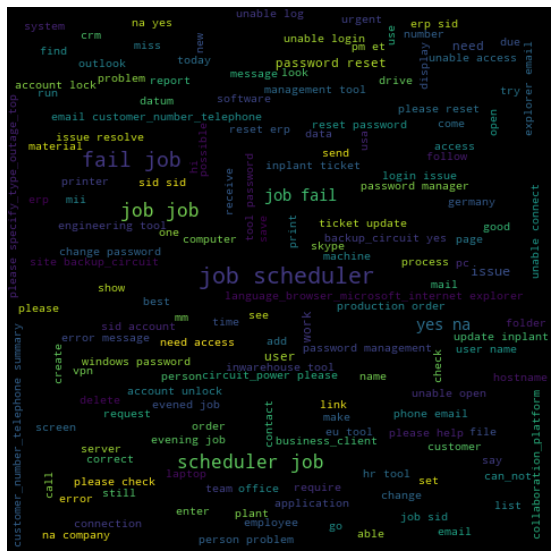

In [ ]:
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(wordCloudfinal)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
new_df = df_ML.copy()
new_df['words'] = data_words_trigrams
new_df.head()

,Short description,Description,Caller,Assignment group,New Assignment Group,combined_description,pred_group,Language,words
0,login issue,verified user details. employee and manager na...,spxjnwir pjlcoqds,GRP_0,GRP_0,login issue verify user detail employee manage...,NaN,en,"[login, issue, verify, user, detail, employee,..."
1,outlook,team my meetings/skype meetings etc are not ap...,hmjdrvpb komuaywn,GRP_0,GRP_0,outlook team meeting / skype meeting etc appea...,NaN,en,"[outlook, team, meeting, skype, meeting, etc, ..."
2,cant log in to vpn,hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,GRP_0,can not log vpn hi can not log vpn best,NaN,en,"[can_not, log, vpn, hi, can_not, log, vpn, best]"
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,GRP_0,unable access hr tool page unable access hr to...,NaN,en,"[unable, access, hr, tool, page, unable, acces..."
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,GRP_0,skype error skype error,NaN,no,"[skype, error, skype, error]"


In [ ]:
sortedListOfGroup = df_ML['New Assignment Group'].value_counts().sort_values(ascending=False).index
sortedListOfGroup

Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_9', 'GRP_12', 'GRP_19', 'GRP_2',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_29', 'GRP_4', 'GRP_99', 'GRP_18', 'GRP_16', 'GRP_31',
       'GRP_34', 'GRP_26', 'GRP_28', 'GRP_41', 'GRP_40', 'GRP_30', 'GRP_42',
       'GRP_15', 'GRP_45', 'GRP_20', 'GRP_1', 'GRP_11', 'GRP_22', 'GRP_47',
       'GRP_62', 'GRP_48', 'GRP_7', 'GRP_17', 'GRP_39', 'GRP_27', 'GRP_60',
       'GRP_44', 'GRP_37', 'GRP_50', 'GRP_21', 'GRP_36', 'GRP_53'],
      dtype='object')

In [ ]:
def wordcloud_grp(f, x):
    wordclouds_0=' '.join(map(str, f))

    wc = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10, max_words=50).generate(wordclouds_0.replace('\'',''))
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common 50 words of {}".format(x))
    plt.margins(x=0, y=0)
    plt.show()

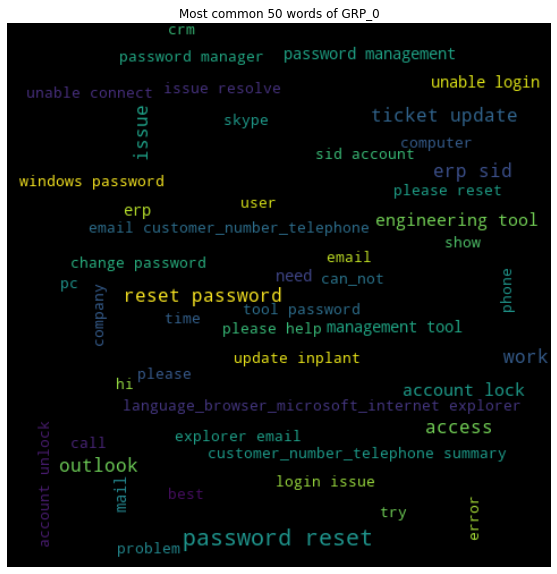

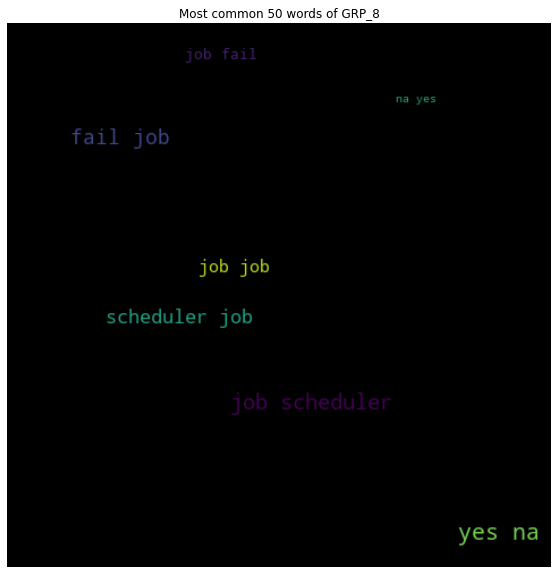

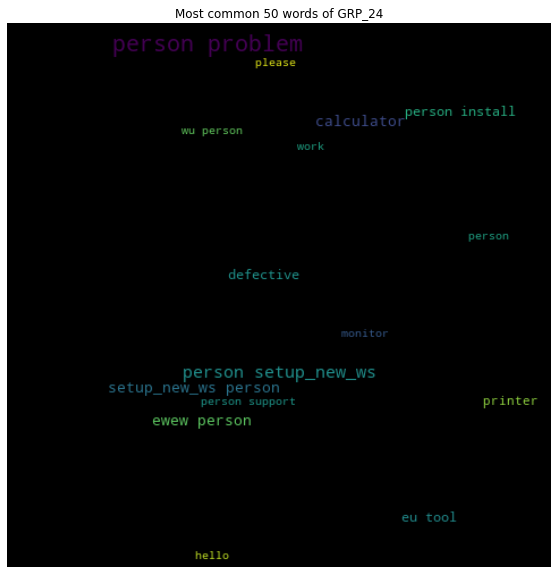

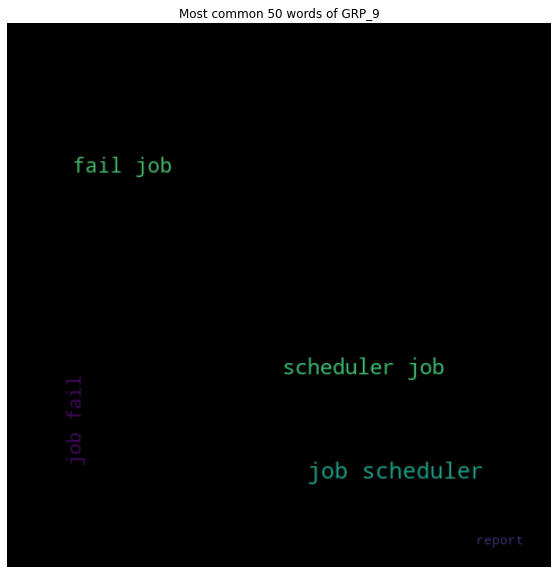

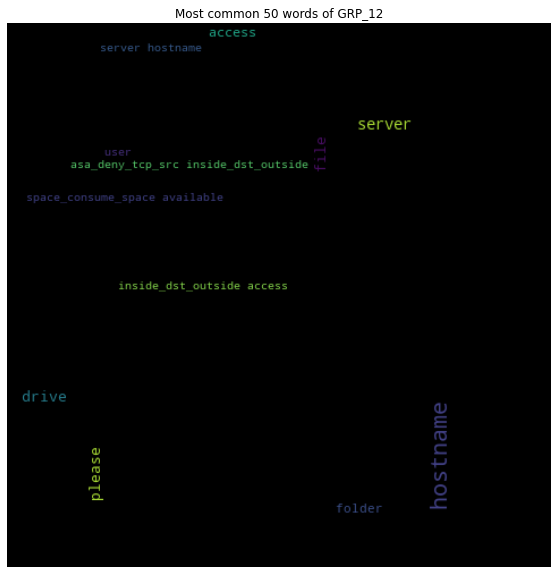

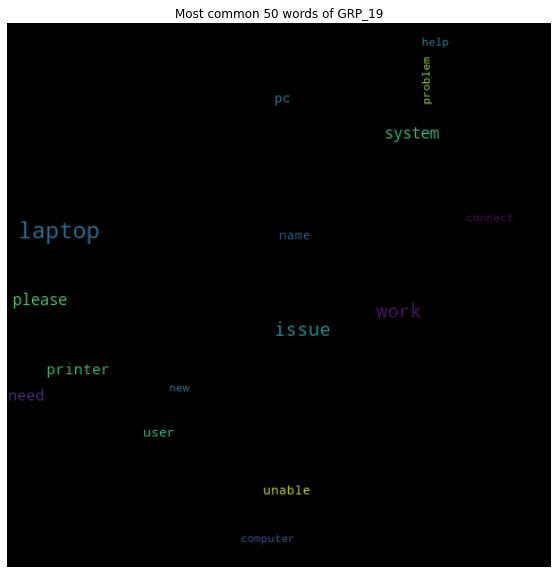

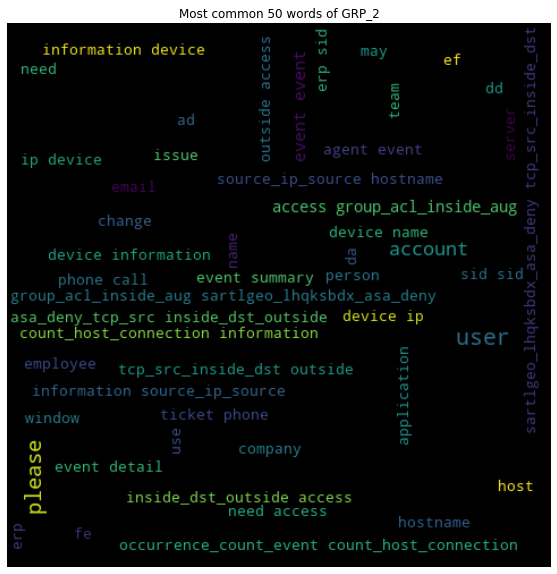

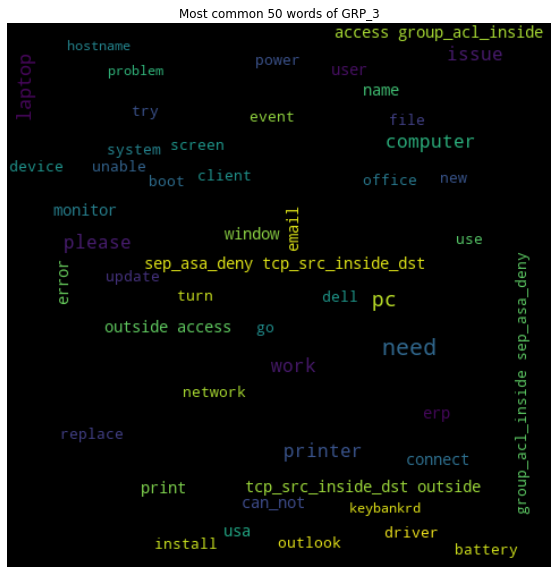

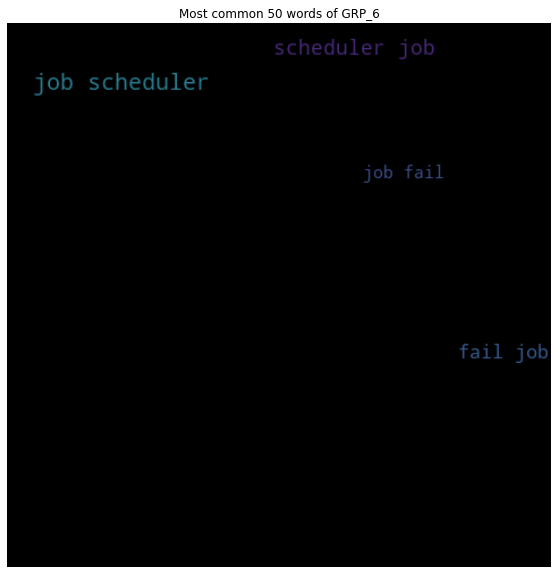

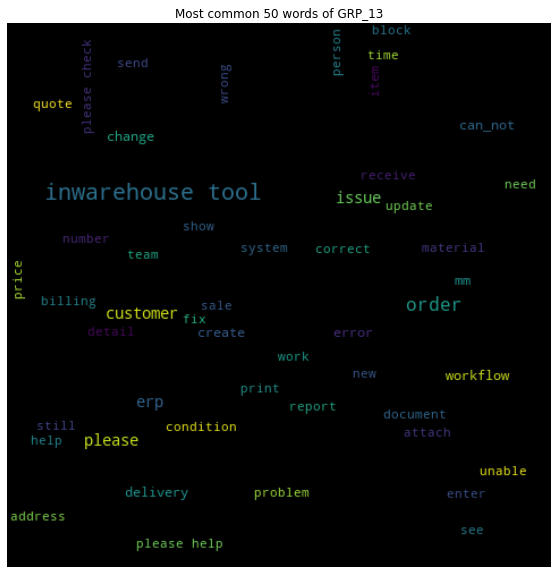

In [ ]:
for i in range(10):

    Grp = new_df[new_df ['New Assignment Group'] == sortedListOfGroup[i]]
    Grp = Grp['words']
    wordcloud_grp(Grp,sortedListOfGroup[i])

In [ ]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     7860 non-null   object
 1   Description           7860 non-null   object
 2   Caller                7860 non-null   object
 3   Assignment group      7860 non-null   object
 4   New Assignment Group  7860 non-null   object
 5   combined_description  7860 non-null   object
 6   pred_group            0 non-null      object
 7   Language              7860 non-null   object
dtypes: object(8)
memory usage: 491.4+ KB


In [ ]:
df_DL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     7860 non-null   object
 1   Description           7860 non-null   object
 2   Caller                7860 non-null   object
 3   Assignment group      7860 non-null   object
 4   New Assignment Group  7860 non-null   object
 5   combined_description  7860 non-null   object
 6   pred_group            0 non-null      object
 7   Language              7860 non-null   object
dtypes: object(8)
memory usage: 491.4+ KB


In [ ]:
df_ML_Aug = df_ML.copy()
df_ML_NonAug = df_ML.copy()
df_DL_Aug = df_DL.copy()
df_DL_NonAug = df_DL.copy()

In [ ]:
df_ML_Aug.shape, df_ML_NonAug.shape, df_DL_Aug.shape,df_DL_NonAug.shape

((7860, 8), (7860, 8), (7860, 8), (7860, 8))

In [ ]:
df_ML_Aug.to_excel("df_ML_Aug.xlsx")
df_ML_NonAug.to_excel("df_ML_NonAug.xlsx")
df_DL_Aug.to_excel("df_DL_Aug.xlsx")
df_DL_NonAug.to_excel("df_DL_NonAug.xlsx")

#### Modeling - DL model

In [3]:
# Load the dataset 
#dataset2_DL = df_DL[df_DL['pred_group'].isna()]
dataset2_DL = pd.read_excel('/content/sample_data/df_DL_Aug.xlsx')

In [3]:
dataset2_DL.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,New Assignment Group,combined_description,pred_group,Language
0,0,login issue,verified user details. employee and manager na...,spxjnwir pjlcoqds,GRP_0,GRP_0,login issue verified user details employee an...,NaN,en
1,1,outlook,team my meetings/skype meetings etc are not ap...,hmjdrvpb komuaywn,GRP_0,GRP_0,outlook team my meetings/skype meetings etc ar...,NaN,en
2,2,cant log in to vpn,hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,GRP_0,cant log in to vpn hi i cannot log on to vpn best,NaN,en
3,3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,GRP_0,unable to access hr tool page unable to access...,NaN,en
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,GRP_0,skype error skype error,NaN,no


In [5]:
dataset2_DL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            7860 non-null   int64  
 1   Short description     7860 non-null   object 
 2   Description           7860 non-null   object 
 3   Caller                7860 non-null   object 
 4   Assignment group      7860 non-null   object 
 5   New Assignment Group  7860 non-null   object 
 6   combined_description  7860 non-null   object 
 7   pred_group            0 non-null      float64
 8   Language              7860 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 552.8+ KB


In [4]:
dataset2_DL = dataset2_DL[dataset2_DL['pred_group'].isna()]

In [7]:
dataset2_DL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7860 entries, 0 to 7859
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            7860 non-null   int64  
 1   Short description     7860 non-null   object 
 2   Description           7860 non-null   object 
 3   Caller                7860 non-null   object 
 4   Assignment group      7860 non-null   object 
 5   New Assignment Group  7860 non-null   object 
 6   combined_description  7860 non-null   object 
 7   pred_group            0 non-null      float64
 8   Language              7860 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 614.1+ KB


In [5]:
dataset2_DL.shape

(7860, 9)

In [6]:
# Create a column for target (assignment group) variable
dataset2_DL['group'] = dataset2_DL['New Assignment Group'].str[4:]
#from sklearn. preprocessing import LabelEncoder
#le = LabelEncoder()
#dataset2['group'] = le. fit_transform(dataset2['group'])
dataset2_DL['group'] = dataset2_DL['group'].astype('int8')
dataset2_DL['target'] = dataset2_DL['group'].astype('category').cat.codes

dataset2_DL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7860 entries, 0 to 7859
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            7860 non-null   int64  
 1   Short description     7860 non-null   object 
 2   Description           7860 non-null   object 
 3   Caller                7860 non-null   object 
 4   Assignment group      7860 non-null   object 
 5   New Assignment Group  7860 non-null   object 
 6   combined_description  7860 non-null   object 
 7   pred_group            0 non-null      float64
 8   Language              7860 non-null   object 
 9   group                 7860 non-null   int8   
 10  target                7860 non-null   int8   
dtypes: float64(1), int64(1), int8(2), object(7)
memory usage: 629.4+ KB


In [7]:
dataset2_DL.groupby(["group", "target"]).size()

group  target
0      0         3660
1      1           31
2      2          209
3      3          197
4      4           95
5      5          128
6      6          182
7      7           21
8      8          591
9      9          252
10     10         139
11     11          30
12     12         251
13     13         143
14     14         116
15     15          36
16     16          84
17     17          19
18     18          88
19     19         213
20     20          33
21     21          13
22     22          27
24     23         285
25     24         115
26     25          55
27     26          17
28     27          44
29     28          97
30     29          39
31     30          67
33     31         103
34     32          62
36     33          11
37     34          15
39     35          19
40     36          40
41     37          40
42     38          37
44     39          15
45     40          35
47     41          27
48     42          25
50     43          14
53     44         

In [8]:
dataset2_DL=dataset2_DL.drop(columns=['Unnamed: 0'],axis=1)

In [9]:
dataset2_DL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7860 entries, 0 to 7859
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     7860 non-null   object 
 1   Description           7860 non-null   object 
 2   Caller                7860 non-null   object 
 3   Assignment group      7860 non-null   object 
 4   New Assignment Group  7860 non-null   object 
 5   combined_description  7860 non-null   object 
 6   pred_group            0 non-null      float64
 7   Language              7860 non-null   object 
 8   group                 7860 non-null   int8   
 9   target                7860 non-null   int8   
dtypes: float64(1), int8(2), object(7)
memory usage: 568.0+ KB


## trying DL without augmentation or replacement

In [9]:
# Create a column for target (assignment group) variable
dataset2_DL_noaug=dataset2_DL.copy()

In [10]:
max_features = 10000
maxlen = 300
embedding_size = 200

In [11]:
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(dataset2_DL_noaug['combined_description']))
X = tokenizer.texts_to_sequences(dataset2_DL_noaug['combined_description'])

In [12]:
X = pad_sequences(X, maxlen = maxlen)
Y = np.asarray(dataset2_DL_noaug['target'])
#print sample headline and lable
print(f'\nsample headline:\n{X[0]}\n\n Label of sample headline: {Y[0]}')


sample headline:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 

In [13]:
tokenizer.word_index

{'to': 1,
 'the': 2,
 'in': 3,
 'job': 4,
 'is': 5,
 'not': 6,
 'and': 7,
 'on': 8,
 'for': 9,
 'i': 10,
 'a': 11,
 'at': 12,
 'no': 13,
 'please': 14,
 'password': 15,
 'scheduler': 16,
 'erp': 17,
 'of': 18,
 'failed': 19,
 'this': 20,
 'tool': 21,
 'it': 22,
 'unable': 23,
 'access': 24,
 'company': 25,
 'with': 26,
 'na': 27,
 'user': 28,
 'reset': 29,
 'yes': 30,
 'my': 31,
 'issue': 32,
 'sid': 33,
 'from': 34,
 'you': 35,
 'person': 36,
 'ticket': 37,
 'error': 38,
 'account': 39,
 'hostname': 40,
 'have': 41,
 'outlook': 42,
 'be': 43,
 'can': 44,
 'are': 45,
 'login': 46,
 'email': 47,
 'help': 48,
 'that': 49,
 'working': 50,
 'am': 51,
 'we': 52,
 'need': 53,
 'system': 54,
 'e': 55,
 'name': 56,
 'as': 57,
 'when': 58,
 'id': 59,
 'has': 60,
 'or': 61,
 'network': 62,
 'by': 63,
 'but': 64,
 'message': 65,
 'if': 66,
 'was': 67,
 'printer': 68,
 'update': 69,
 'new': 70,
 'site': 71,
 'server': 72,
 'vpn': 73,
 'an': 74,
 'engineering': 75,
 'x': 76,
 'out': 77,
 'f': 78,
 

In [14]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

11849


In [15]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile('drive/My Drive/datasets/NLP/sarcasm_detection/Glove.6B.200d.zip', 'r') as z:
  z.extractall()

In [17]:
EMBEDDING_FILE = 'drive/My Drive/datasets/NLP/sarcasm_detection/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [18]:
# Create training and test datasets with 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = SEED, shuffle = True)
print('\033[1mShape of the training set:\033[0m', x_train.shape, y_train.shape)
print('\033[1mShape of the test set:\033[0m', x_test.shape, y_test.shape)

print(f'\nNumber of rows in training dataset: {x_train.shape[0]}')
print(f'Number of columns in training dataset: {x_train.shape[1]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(x_train)))}')

print(f'\nNumber of rows in test dataset: {x_test.shape[0]}')
print(f'Number of columns in test dataset: {x_test.shape[1]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(x_test)))}')

Shape of the training set: (6288, 300) (6288,)
Shape of the test set: (1572, 300) (1572,)

Number of rows in training dataset: 6288
Number of columns in training dataset: 300
Number of unique words in training dataset: 8657

Number of rows in test dataset: 1572
Number of columns in test dataset: 300
Number of unique words in test dataset: 4447


In [19]:
# converting y data into categorical (one-hot encoding)
ytrain = to_categorical(y_train)
ytest = to_categorical(y_test)

In [20]:
print(f'\nsample headline:\n{x_train[50]}\n\n Label of sample headline: {ytrain[50]}\n\n Label of sample headline: {y_train[50]}')


sample headline:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    

In [23]:
num_class = len(np.unique(y_train))
num_class

48

In [24]:
num_class_test = len(np.unique(y_test))
num_class_test

48

In [25]:
num_class_all = len(np.unique(dataset2_DL['group'].values))
num_class_all

48

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 300, 200)          2369800   
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              336896    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               25700     
                                                                 
 dense_2 (Dense)             (None, 48)                4848      
                                                             

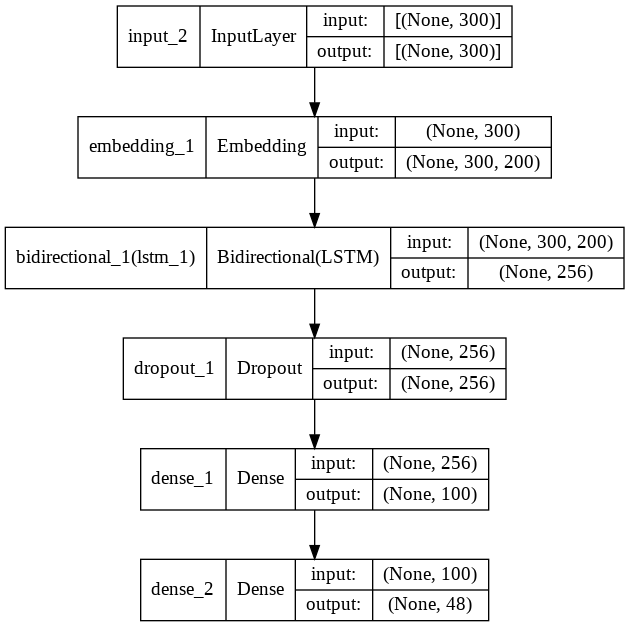

In [26]:
input_layer = Input(shape=(maxlen,),dtype=tf.int64)
embed = Embedding(num_words,output_dim=200,input_length=maxlen,weights=[embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
lstm=Bidirectional(LSTM(128))(embed)
drop=Dropout(0.3)(lstm)
dense =Dense(100,activation='relu')(drop)
out=Dense(num_class,activation='softmax')(dense)

model_td = Model(input_layer,out)
model_td.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model_td.summary()
tf.keras.utils.plot_model(model_td, show_shapes = True)

In [27]:
es = EarlyStopping(monitor='val_accuracy', mode = 'auto', verbose = 1, patience = 5)  
mc = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto')
lr_reduction = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience=2, min_lr=0.0001)

In [28]:
batch_size = 100
epochs = 10
model_td_history = model_td.fit(x_train,ytrain,batch_size=batch_size, epochs=epochs, callbacks=[es,mc,lr_reduction], validation_data = (x_test, ytest),verbose=True)

Epoch 1/10
62/63 [============================>.] - ETA: 0s - loss: 2.4396 - accuracy: 0.5037
Epoch 00001: val_accuracy improved from -inf to 0.56425, saving model to model-001-0.564249.h5
63/63 [==============================] - 10s 70ms/step - loss: 2.4311 - accuracy: 0.5054 - val_loss: 2.0008 - val_accuracy: 0.5642 - lr: 0.0010
Epoch 2/10
62/63 [============================>.] - ETA: 0s - loss: 1.8633 - accuracy: 0.5689
Epoch 00002: val_accuracy improved from 0.56425 to 0.57570, saving model to model-002-0.575700.h5
63/63 [==============================] - 4s 59ms/step - loss: 1.8663 - accuracy: 0.5685 - val_loss: 1.8228 - val_accuracy: 0.5757 - lr: 0.0010
Epoch 3/10
62/63 [============================>.] - ETA: 0s - loss: 1.6611 - accuracy: 0.5869
Epoch 00003: val_accuracy improved from 0.57570 to 0.58651, saving model to model-003-0.586514.h5
63/63 [==============================] - 4s 59ms/step - loss: 1.6627 - accuracy: 0.5860 - val_loss: 1.7019 - val_accuracy: 0.5865 - lr: 0.00

In [29]:
# Evaluate the model & report accuracy
from keras.models import load_model
model_td_saved = load_model("model-008-0.628499.h5")
scores = model_td_saved.evaluate(x_test, ytest, batch_size = 100, verbose = 1)
print('Test accuracy: %.2f%%' % (scores[1]*100))

16/16 [==============================] - 1s 22ms/step - loss: 1.5787 - accuracy: 0.6285
Test accuracy: 62.85%


In [30]:
#displaying the classification report on test/validation data
yfit = model_td_saved.predict(x_test)
test_predicted = np.argmax ( yfit, axis=-1 )
test = np.argmax ( ytest, axis=-1 )
from sklearn.metrics import classification_report
print(classification_report(test,test_predicted))

              precision    recall  f1-score   support

           0       0.79      0.90      0.85       737
           1       0.00      0.00      0.00         9
           2       0.24      0.43      0.31        46
           3       0.25      0.41      0.31        29
           4       0.50      0.29      0.37        24
           5       0.82      0.41      0.55        22
           6       0.47      0.58      0.52        26
           7       0.00      0.00      0.00         4
           8       0.62      0.84      0.71       129
           9       0.57      0.08      0.14        51
          10       0.62      0.40      0.49        25
          11       0.00      0.00      0.00         6
          12       0.56      0.65      0.60        51
          13       0.23      0.46      0.31        26
          14       0.16      0.33      0.21        18
          15       0.00      0.00      0.00         6
          16       0.15      0.12      0.14        16
          17       0.00    

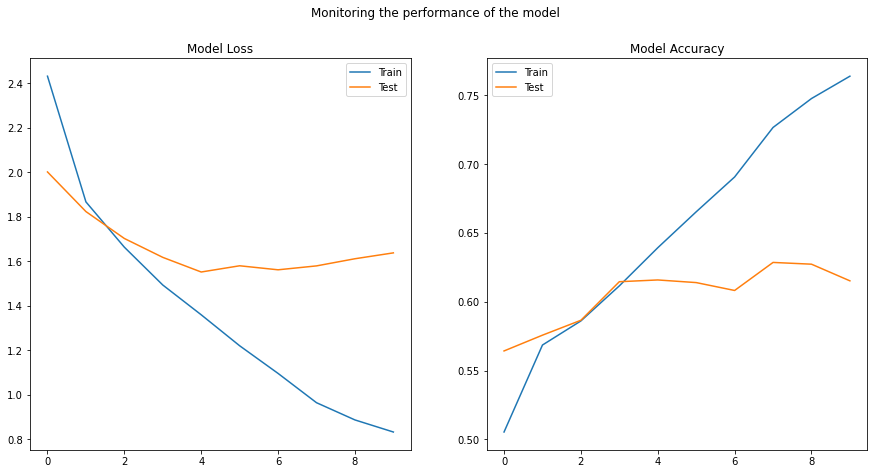

In [31]:
#visualizing model performance  - loss and accuracy 
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))
f.suptitle('Monitoring the performance of the model')

ax1.plot(model_td_history.history['loss'], label = 'Train')
ax1.plot(model_td_history.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(model_td_history.history['accuracy'], label = 'Train')
ax2.plot(model_td_history.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

#### DL Model with data Augmentation (synonym based)

In [32]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(dataset2_DL.combined_description, 
                                                    dataset2_DL.target, 
                                                    test_size=0.20, 
                                                    random_state=SEED)
print('\033[1mShape of the training set:\033[0m', X_train.shape, y_train.shape)
print('\033[1mShape of the test set:\033[0m', X_test.shape, y_test.shape)

Shape of the training set: (6288,) (6288,)
Shape of the test set: (1572,) (1572,)


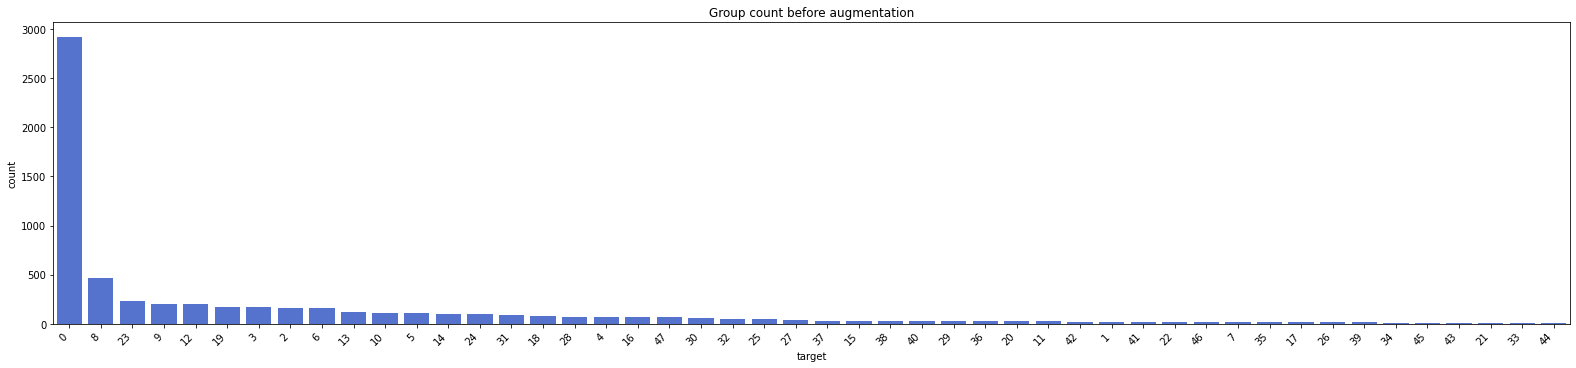

In [33]:
#Create Dataset 
y_train_df_old = pd.DataFrame(y_train,columns=['target'])
#y_train_df_old_nogrp0 = dataset1[dataset1['Assignment group'] != 'GRP_0']

descending_order = y_train_df_old['target'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='target', data=y_train_df_old, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.title('Group count before augmentation')
plt.show()

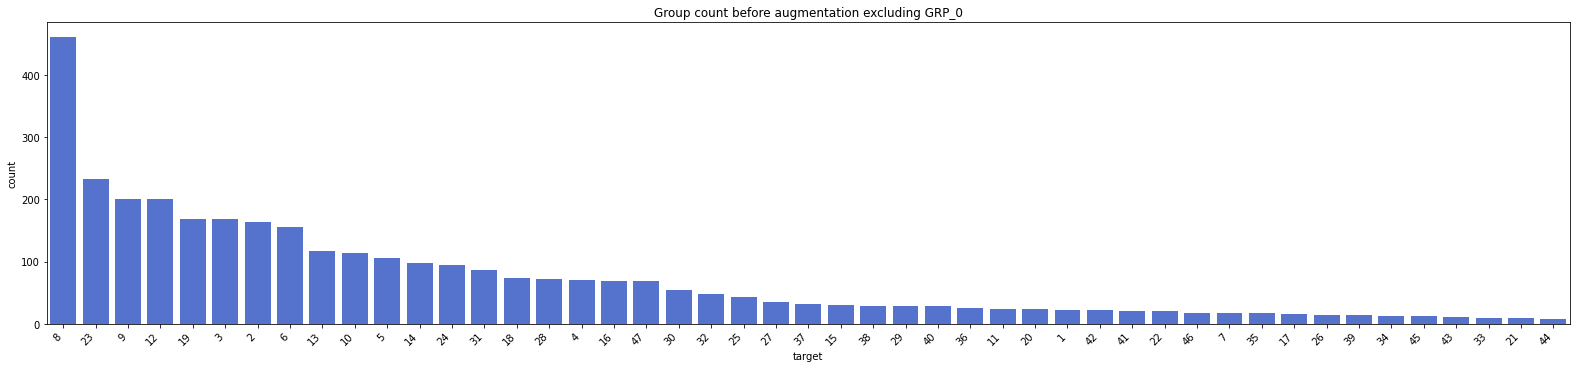

In [34]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
#y_train_df_old = pd. DataFrame(y_train,columns=['group'])
y_train_df_old_nogrp0 = y_train_df_old[y_train_df_old['target'] != 0]

descending_order = y_train_df_old_nogrp0['target'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='target', data=y_train_df_old_nogrp0, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.title('Group count before augmentation excluding GRP_0')
plt.show()

In [35]:
#import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [37]:
!pip install nlpaug

     |████████████████████████████████| 408 kB 4.1 MB/s 
     |████████████████████████████████| 11.3 MB 60.4 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


In [38]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

aug = naw.SynonymAug(aug_src='wordnet',aug_max=4)

In [39]:
# Take an example for augmentation
example=aug.augment(X_train[5],n=2)
print('\033[1mOriginal text:\033[0m')
print(X_train[5])
print('_'*100)
print('\033[1mAugmented text:\033[0m')
print(example[0])
print(example[1])

Original text:
unable to log in to engineering tool and skype unable to log in to engineering tool and skype
____________________________________________________________________________________________________
Augmented text:
unable to log in to engine room puppet and skype ineffective to log in to engineering tool and skype
unable to lumber in to engineering tool and skype ineffective to lumber in to engineering tool and skype


In [40]:
augmented_sentences=[]
augmented_sentences_labels=[]
for i in X_train.index:
  if y_train[i] in (24,9,12,2,19,3,6):
    temps=aug.augment(X_train[i],n=3)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] in (13,10,5,14,24,31,18,28,4,16,47):    
    temps=aug.augment(X_train[i],n=6)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] in (30,32,25,27,37,15,38,29,40,36,11,20,1,42,41,22):    
    temps=aug.augment(X_train[i],n=12)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] in (46,7,35,17,26,39,34,45,43,33,21,44):    
    temps=aug.augment(X_train[i],n=24)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])

In [41]:
X_train=X_train.append(pd.Series(augmented_sentences),ignore_index=True)
y_train=y_train.append(pd.Series(augmented_sentences_labels),ignore_index=True)

print(X_train.shape)
print(y_train.shape)

(24621,)
(24621,)


In [42]:
y_train_df = pd. DataFrame(y_train,columns=['target'])

In [43]:
y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24621 entries, 0 to 24620
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  24621 non-null  int64
dtypes: int64(1)
memory usage: 192.5 KB


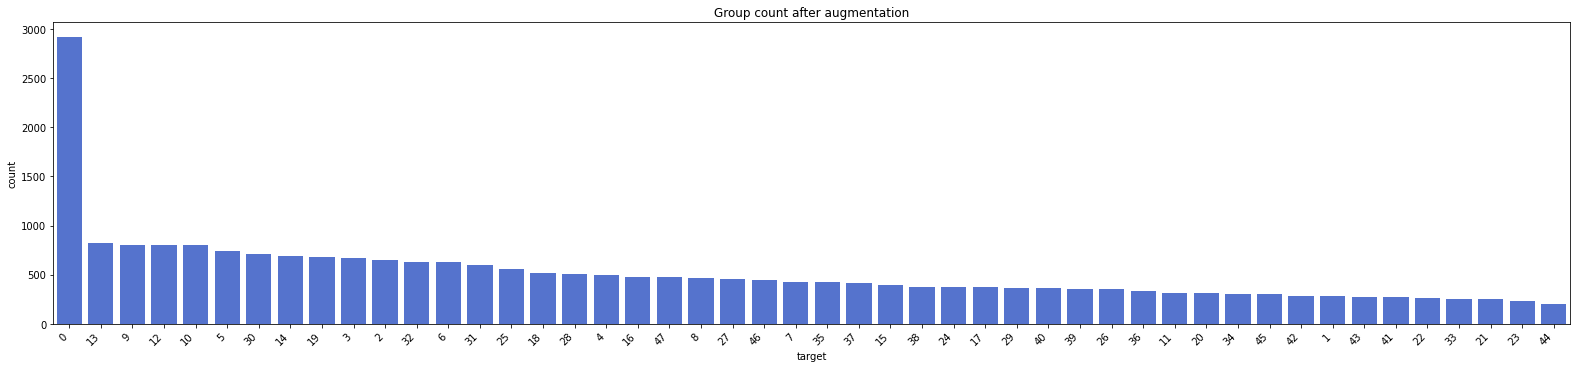

In [44]:
#Create Dataset 
#y_train_df_old_nogrp0 = dataset1[dataset1['Assignment group'] != 'GRP_0']

descending_order = y_train_df['target'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='target', data=y_train_df, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.title('Group count after augmentation')
plt.show()

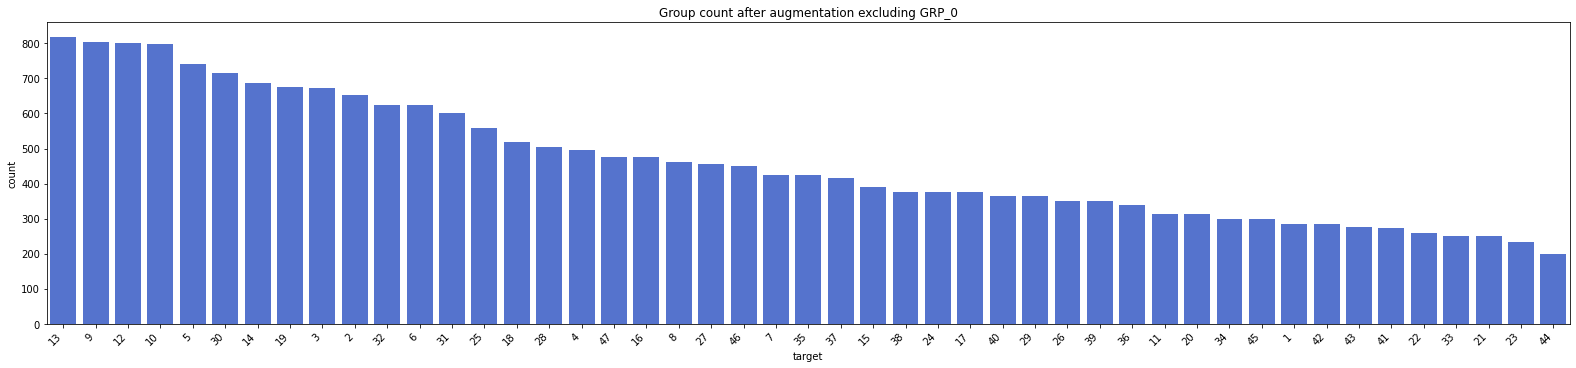

In [45]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
#y_train_df_old = pd. DataFrame(y_train,columns=['group'])
y_train_df_nogrp0 = y_train_df[y_train_df['target'] != 0]

descending_order = y_train_df_nogrp0['target'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='target', data=y_train_df_nogrp0, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.title('Group count after augmentation excluding GRP_0')
plt.show()

In [46]:
y_train_df.groupby(['target']).size()

target
0     2923
1      286
2      652
3      672
4      497
5      742
6      624
7      425
8      462
9      804
10     798
11     312
12     800
13     819
14     686
15     390
16     476
17     375
18     518
19     676
20     312
21     250
22     260
23     233
24     376
25     559
26     350
27     455
28     504
29     364
30     715
31     602
32     624
33     250
34     300
35     425
36     338
37     416
38     377
39     350
40     364
41     273
42     286
43     275
44     200
45     300
46     450
47     476
dtype: int64

In [47]:
max_features = 10000
maxlen = 300
embedding_size = 200

In [48]:
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(X_train)
x_train = tokenizer.texts_to_sequences(X_train)

In [49]:
x_test = tokenizer.texts_to_sequences(X_test)

In [50]:
x_train = pad_sequences(x_train, padding='pre', maxlen = maxlen)
x_test = pad_sequences(x_test, padding='pre', maxlen = maxlen)
#Y = np.asarray(dataset2_DL['group'])

In [51]:
#print sample headline and lable
print(f'\nsample headline:\n{x_train[0]}\n\n Label of sample headline: {y_train[0]}')


sample headline:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    

In [52]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'in': 3,
 'is': 4,
 'job': 5,
 'and': 6,
 'a': 7,
 'for': 8,
 'not': 9,
 'on': 10,
 'at': 11,
 'of': 12,
 'please': 13,
 'i': 14,
 'this': 15,
 'scheduler': 16,
 'it': 17,
 'erp': 18,
 "'": 19,
 'hostname': 20,
 'be': 21,
 'no': 22,
 'from': 23,
 'with': 24,
 'failed': 25,
 'you': 26,
 'are': 27,
 'tool': 28,
 'e': 29,
 'company': 30,
 'can': 31,
 'we': 32,
 'access': 33,
 'error': 34,
 'that': 35,
 'password': 36,
 'user': 37,
 'sid': 38,
 'have': 39,
 'as': 40,
 'c': 41,
 'issue': 42,
 'd': 43,
 'system': 44,
 'by': 45,
 'my': 46,
 'unable': 47,
 'id': 48,
 'ticket': 49,
 'f': 50,
 'when': 51,
 'person': 52,
 'plant': 53,
 'help': 54,
 'or': 55,
 'need': 56,
 'but': 57,
 'event': 58,
 'reset': 59,
 'has': 60,
 'account': 61,
 'working': 62,
 'usa': 63,
 'email': 64,
 's': 65,
 'if': 66,
 'cannot': 67,
 'an': 68,
 'server': 69,
 'order': 70,
 'name': 71,
 'see': 72,
 'up': 73,
 'message': 74,
 'information': 75,
 'am': 76,
 't': 77,
 'data': 78,
 'crm': 79,
 'bel

In [53]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

13703


In [ ]:
# Mounting Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#Extract Glove embedding zip file
#from zipfile import ZipFile
#with ZipFile('drive/My Drive/datasets/NLP/sarcasm_detection/Glove.6B.200d.zip', 'r') as z:
  #z.extractall()

In [54]:
EMBEDDING_FILE = 'drive/My Drive/datasets/NLP/sarcasm_detection/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
   # word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [55]:
#splitting dataset into train and test datasets
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = SEED, shuffle = True)

print(f'\nNumber of rows in training dataset: {x_train.shape[0]}')
print(f'Number of columns in training dataset: {x_train.shape[1]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(x_train)))}')

print(f'\nNumber of rows in test dataset: {x_test.shape[0]}')
print(f'Number of columns in test dataset: {x_test.shape[1]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(x_test)))}')


Number of rows in training dataset: 24621
Number of columns in training dataset: 300
Number of unique words in training dataset: 9793

Number of rows in test dataset: 1572
Number of columns in test dataset: 300
Number of unique words in test dataset: 3263


In [56]:
print(f'\nsample headline:\n{x_train[5]}\n\n Label of sample headline: {y_train[5]}')


sample headline:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 36 59 36 59]

 Label of sample headline: 0


In [57]:
num_class = len(np.unique(y_train.values))
num_class

48

In [58]:
num_class_test = len(np.unique(y_test.values))
num_class_test

48

In [59]:
num_class_all = len(np.unique(dataset2_DL['group'].values))
num_class_all

48

In [61]:
# converting y data into categorical (one-hot encoding)
ytrain = to_categorical(y_train)
ytest = to_categorical(y_test)

In [62]:
print(f'\nsample headline:\n{x_train[50]}\n\n Label of sample headline:\n{ytrain[50]}\n\n Label of sample headline:\n{y_train[50]}')


sample headline:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    

In [63]:
ytest.shape[0],ytest.shape[1]

(1572, 48)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 300, 200)          2740600   
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              336896    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               25700     
                                                                 
 dense_4 (Dense)             (None, 48)                4848      
                                                           

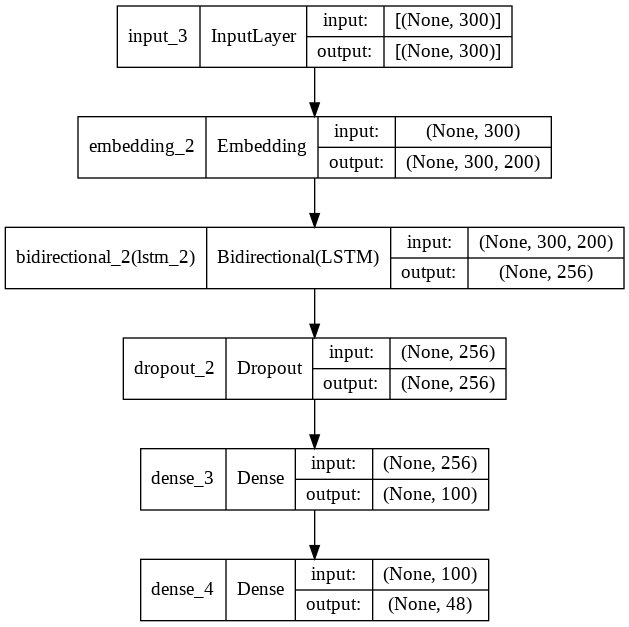

In [64]:
input_layer = Input(shape=(maxlen,),dtype=tf.int64)
embed = Embedding(num_words,output_dim=200,input_length=maxlen,weights=[embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
lstm=Bidirectional(LSTM(128))(embed)
drop=Dropout(0.3)(lstm)
dense =Dense(100,activation='relu')(drop)
out=Dense(num_class,activation='softmax')(dense)

model_td = Model(input_layer,out)
model_td.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model_td.summary()
tf.keras.utils.plot_model(model_td, show_shapes = True)

In [65]:
es = EarlyStopping(monitor='val_accuracy', mode = 'auto', verbose = 1, patience = 5)  
mc = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto')
lr_reduction = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience=2, min_lr=0.0001)

In [66]:
batch_size = 100
epochs = 10
model_td_history = model_td.fit(x_train,ytrain,batch_size=batch_size, epochs=epochs, callbacks=[es,mc,lr_reduction], validation_data = (x_test, ytest),verbose=True)

Epoch 1/10
246/247 [============================>.] - ETA: 0s - loss: 2.7865 - accuracy: 0.2683
Epoch 00001: val_accuracy improved from -inf to 0.49809, saving model to model-001-0.498092.h5
247/247 [==============================] - 17s 57ms/step - loss: 2.7854 - accuracy: 0.2686 - val_loss: 2.1224 - val_accuracy: 0.4981 - lr: 0.0010
Epoch 2/10
246/247 [============================>.] - ETA: 0s - loss: 0.8899 - accuracy: 0.7458
Epoch 00002: val_accuracy improved from 0.49809 to 0.51399, saving model to model-002-0.513995.h5
247/247 [==============================] - 13s 54ms/step - loss: 0.8896 - accuracy: 0.7458 - val_loss: 2.2012 - val_accuracy: 0.5140 - lr: 0.0010
Epoch 3/10
246/247 [============================>.] - ETA: 0s - loss: 0.4068 - accuracy: 0.8817
Epoch 00003: val_accuracy improved from 0.51399 to 0.56361, saving model to model-003-0.563613.h5
247/247 [==============================] - 13s 54ms/step - loss: 0.4065 - accuracy: 0.8818 - val_loss: 2.3999 - val_accuracy: 0.5

In [67]:
# Evaluate the model & report accuracy
from keras.models import load_model
model_td_saved = load_model("model-009-0.608779.h5")
scores = model_td_saved.evaluate(x_test, ytest, batch_size = 100, verbose = 1)
print('Test accuracy: %.2f%%' % (scores[1]*100))

16/16 [==============================] - 1s 21ms/step - loss: 2.7938 - accuracy: 0.6088
Test accuracy: 60.88%


In [68]:
#displaying the classification report on test/validation data
yfit = model_td_saved.predict(x_test)
test_predicted = np.argmax ( yfit, axis=-1 )
test = np.argmax ( ytest, axis=-1 )
from sklearn.metrics import classification_report
print(classification_report(test,test_predicted))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       737
           1       0.29      0.22      0.25         9
           2       0.30      0.28      0.29        46
           3       0.26      0.31      0.29        29
           4       0.40      0.33      0.36        24
           5       0.47      0.36      0.41        22
           6       0.50      0.58      0.54        26
           7       0.00      0.00      0.00         4
           8       0.65      0.72      0.69       129
           9       0.48      0.25      0.33        51
          10       0.50      0.32      0.39        25
          11       0.00      0.00      0.00         6
          12       0.60      0.53      0.56        51
          13       0.52      0.54      0.53        26
          14       0.35      0.33      0.34        18
          15       0.33      0.33      0.33         6
          16       0.43      0.56      0.49        16
          17       0.67    

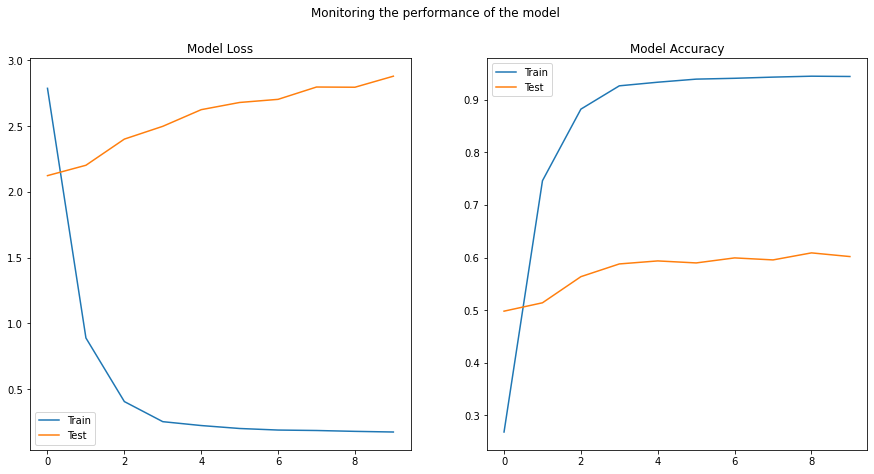

In [69]:
#visualizing model performance  - loss and accuracy 
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))
f.suptitle('Monitoring the performance of the model')

ax1.plot(model_td_history.history['loss'], label = 'Train')
ax1.plot(model_td_history.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(model_td_history.history['accuracy'], label = 'Train')
ax2.plot(model_td_history.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

### DL model with Upsampling/resampling technique (to treat class imabalance)

In [11]:
dataset2_DL_US=dataset2_DL.copy()

In [12]:
dataset2_DL_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7860 entries, 0 to 7859
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     7860 non-null   object 
 1   Description           7860 non-null   object 
 2   Caller                7860 non-null   object 
 3   Assignment group      7860 non-null   object 
 4   New Assignment Group  7860 non-null   object 
 5   combined_description  7860 non-null   object 
 6   pred_group            0 non-null      float64
 7   Language              7860 non-null   object 
 8   group                 7860 non-null   int8   
 9   target                7860 non-null   int8   
dtypes: float64(1), int8(2), object(7)
memory usage: 568.0+ KB


In [13]:
dataset2_DL_US.drop(columns=['group','target'],axis=1,inplace=True)

In [14]:
dataset2_DL_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7860 entries, 0 to 7859
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     7860 non-null   object 
 1   Description           7860 non-null   object 
 2   Caller                7860 non-null   object 
 3   Assignment group      7860 non-null   object 
 4   New Assignment Group  7860 non-null   object 
 5   combined_description  7860 non-null   object 
 6   pred_group            0 non-null      float64
 7   Language              7860 non-null   object 
dtypes: float64(1), object(7)
memory usage: 552.7+ KB


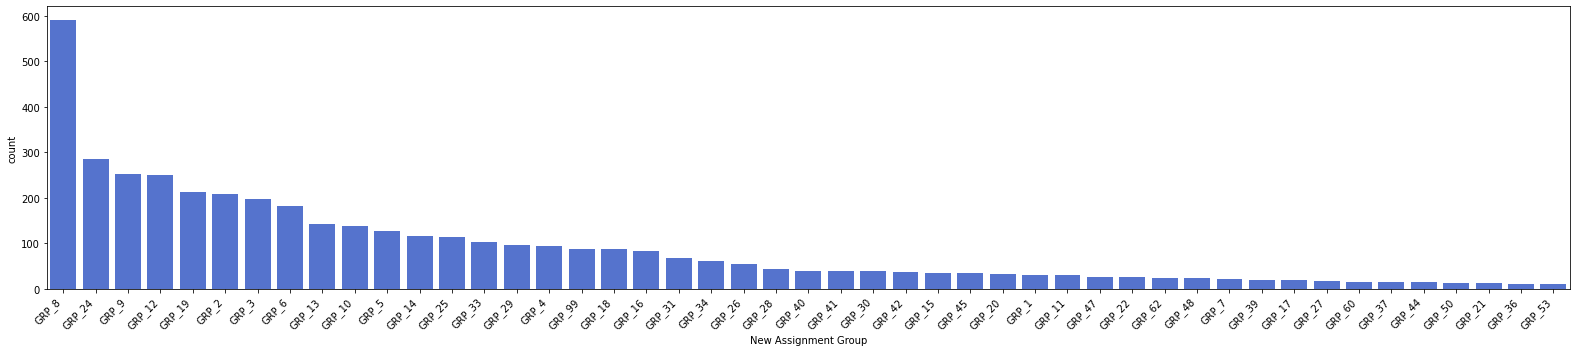

In [15]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
dataset2_DL_nogrp0 = dataset2_DL_US[dataset2_DL_US['New Assignment Group'] != 'GRP_0']

descending_order = dataset2_DL_nogrp0['New Assignment Group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='New Assignment Group', data=dataset2_DL_nogrp0, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [16]:
maxcount = dataset2_DL_nogrp0['New Assignment Group'].value_counts().max()
maxcount

591

In [17]:
dataset2_DL_grp0 = dataset2_DL_US[dataset2_DL_US['New Assignment Group'] == 'GRP_0']

In [18]:
dataset2_DL_grp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3660 entries, 0 to 7857
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     3660 non-null   object 
 1   Description           3660 non-null   object 
 2   Caller                3660 non-null   object 
 3   Assignment group      3660 non-null   object 
 4   New Assignment Group  3660 non-null   object 
 5   combined_description  3660 non-null   object 
 6   pred_group            0 non-null      float64
 7   Language              3660 non-null   object 
dtypes: float64(1), object(7)
memory usage: 257.3+ KB


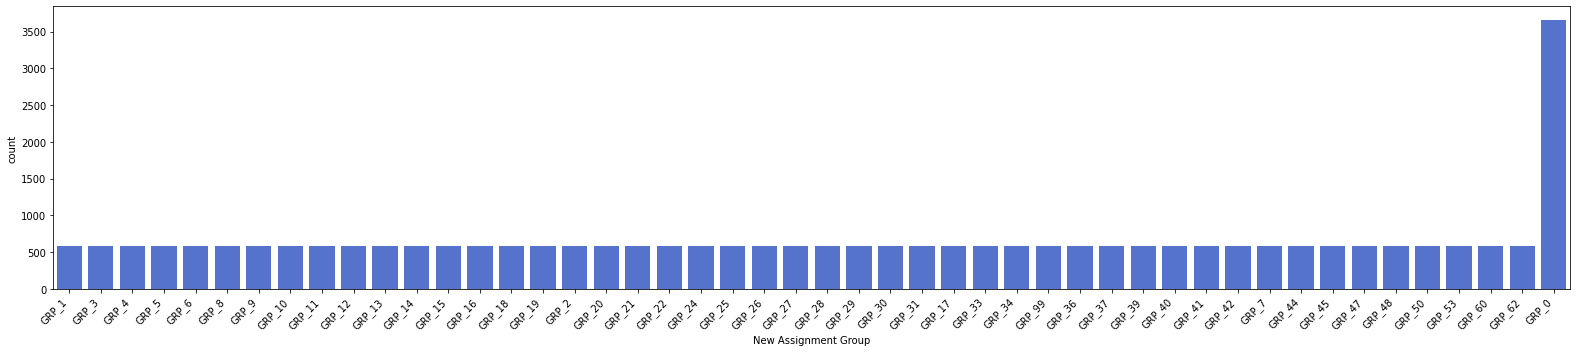

In [20]:
# Treat the imbalance in the dataset by resampling to 591

dataset2_DL_nogrp0_upsampled = dataset2_DL_nogrp0[0:0]
for grp in dataset2_DL_nogrp0['New Assignment Group'].unique():
    dataset2_DL_nogrp0_grp = dataset2_DL_nogrp0[dataset2_DL_nogrp0['New Assignment Group'] == grp]
    resampled = resample(dataset2_DL_nogrp0_grp, replace=True, n_samples=int(maxcount), random_state=123)
    dataset2_DL_nogrp0_upsampled = dataset2_DL_nogrp0_upsampled.append(resampled)

dataset2_DL_upsampled=pd.concat([dataset2_DL_nogrp0_upsampled, dataset2_DL_grp0],ignore_index=True)
descending_order = dataset2_DL_upsampled['New Assignment Group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='New Assignment Group', data=dataset2_DL_upsampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [21]:
# Create a column for target (assignment group) variable
dataset2_DL_upsampled['group'] = dataset2_DL_upsampled['New Assignment Group'].str[4:]
#from sklearn. preprocessing import LabelEncoder
#le = LabelEncoder()
#dataset2['group'] = le. fit_transform(dataset2['group'])
dataset2_DL_upsampled['group'] = dataset2_DL_upsampled['group'].astype('int8')
dataset2_DL_upsampled['target'] = dataset2_DL_upsampled['group'].astype('category').cat.codes

dataset2_DL_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31437 entries, 0 to 31436
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     31437 non-null  object 
 1   Description           31437 non-null  object 
 2   Caller                31437 non-null  object 
 3   Assignment group      31437 non-null  object 
 4   New Assignment Group  31437 non-null  object 
 5   combined_description  31437 non-null  object 
 6   pred_group            0 non-null      float64
 7   Language              31437 non-null  object 
 8   group                 31437 non-null  int8   
 9   target                31437 non-null  int8   
dtypes: float64(1), int8(2), object(7)
memory usage: 2.0+ MB


In [22]:
dataset2_DL_upsampled.groupby(["group", "target"]).size()

group  target
0      0         3660
1      1          591
2      2          591
3      3          591
4      4          591
5      5          591
6      6          591
7      7          591
8      8          591
9      9          591
10     10         591
11     11         591
12     12         591
13     13         591
14     14         591
15     15         591
16     16         591
17     17         591
18     18         591
19     19         591
20     20         591
21     21         591
22     22         591
24     23         591
25     24         591
26     25         591
27     26         591
28     27         591
29     28         591
30     29         591
31     30         591
33     31         591
34     32         591
36     33         591
37     34         591
39     35         591
40     36         591
41     37         591
42     38         591
44     39         591
45     40         591
47     41         591
48     42         591
50     43         591
53     44         

In [23]:
max_features = 10000
maxlen = 300
embedding_size = 200

In [24]:
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(dataset2_DL_upsampled['combined_description']))
X = tokenizer.texts_to_sequences(dataset2_DL_upsampled['combined_description'])

In [25]:
X = pad_sequences(X, maxlen = maxlen)
Y = np.asarray(dataset2_DL_upsampled['target'])
#print sample headline and lable
print(f'\nsample headline:\n{X[0]}\n\n Label of sample headline: {Y[0]}')


sample headline:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    

In [26]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'in': 3,
 'is': 4,
 'and': 5,
 'job': 6,
 'a': 7,
 'not': 8,
 'for': 9,
 'on': 10,
 'please': 11,
 'i': 12,
 'at': 13,
 'of': 14,
 'this': 15,
 'it': 16,
 'erp': 17,
 'tool': 18,
 'no': 19,
 'from': 20,
 'scheduler': 21,
 'hostname': 22,
 'with': 23,
 'password': 24,
 'are': 25,
 'you': 26,
 'failed': 27,
 'company': 28,
 'be': 29,
 'error': 30,
 'sid': 31,
 'user': 32,
 'access': 33,
 'we': 34,
 'that': 35,
 'have': 36,
 'can': 37,
 'e': 38,
 'issue': 39,
 'as': 40,
 'my': 41,
 'person': 42,
 'unable': 43,
 'reset': 44,
 'c': 45,
 'system': 46,
 'd': 47,
 'need': 48,
 'ticket': 49,
 'help': 50,
 'or': 51,
 'working': 52,
 'id': 53,
 'when': 54,
 'by': 55,
 'account': 56,
 'plant': 57,
 'has': 58,
 'crm': 59,
 'f': 60,
 'but': 61,
 'if': 62,
 'message': 63,
 'see': 64,
 'email': 65,
 'event': 66,
 'new': 67,
 'an': 68,
 'usa': 69,
 'below': 70,
 'am': 71,
 'server': 72,
 'was': 73,
 'name': 74,
 'cannot': 75,
 'order': 76,
 'all': 77,
 'outlook': 78,
 'number': 79

In [27]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

11703


In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile('drive/My Drive/datasets/NLP/sarcasm_detection/Glove.6B.200d.zip', 'r') as z:
  z.extractall()

In [28]:
sentences = [line.split(' ') for line in dataset2_DL_upsampled['combined_description']]
word2vec = Word2Vec(sentences=sentences,min_count=1)
word2vec.wv.save_word2vec_format('drive/My Drive/datasets/NLP/sarcasm_detection/'+ 'word2vec_vector.txt')

In [47]:
EMBEDDING_FILE = '/content/drive/MyDrive/datasets/NLP/sarcasm_detection/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# load the whole embedding into memory
#embeddings_index = dict()
#f = open(project_path+'word2vec_vector.txt')

#for line in f:
#	values = line.split()
#	word = values[0]
#	coefs = np.asarray(values[1:], dtype='float32')
#	embeddings_index[word] = coefs
#f.close()
#print('Loaded %s word vectors.' % len(embeddings_index))

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [31]:
# Create training and test datasets with 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = SEED, shuffle = True)
print('\033[1mShape of the training set:\033[0m', x_train.shape, y_train.shape)
print('\033[1mShape of the test set:\033[0m', x_test.shape, y_test.shape)

print(f'\nNumber of rows in training dataset: {x_train.shape[0]}')
print(f'Number of columns in training dataset: {x_train.shape[1]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(x_train)))}')

print(f'\nNumber of rows in test dataset: {x_test.shape[0]}')
print(f'Number of columns in test dataset: {x_test.shape[1]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(x_test)))}')

Shape of the training set: (25149, 300) (25149,)
Shape of the test set: (6288, 300) (6288,)

Number of rows in training dataset: 25149
Number of columns in training dataset: 300
Number of unique words in training dataset: 9549

Number of rows in test dataset: 6288
Number of columns in test dataset: 300
Number of unique words in test dataset: 7518


In [32]:
num_class = len(np.unique(y_train))
num_class

48

In [33]:
num_class_test = len(np.unique(y_test))
num_class_test

48

In [34]:
num_class_all = len(np.unique(dataset2_DL_upsampled['group'].values))
num_class_all

48

In [35]:
# converting y data into categorical (one-hot encoding)
ytrain = to_categorical(y_train)
ytest = to_categorical(y_test)

In [36]:
print(f'\nsample headline:\n{x_train[50]}\n\n Label of sample headline: {ytrain[50]}\n\n Label of sample headline: {y_train[50]}')


sample headline:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 300, 200)          2340600   
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              336896    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               25700     
                                                                 
 dense_3 (Dense)             (None, 48)                4848      
                                                           

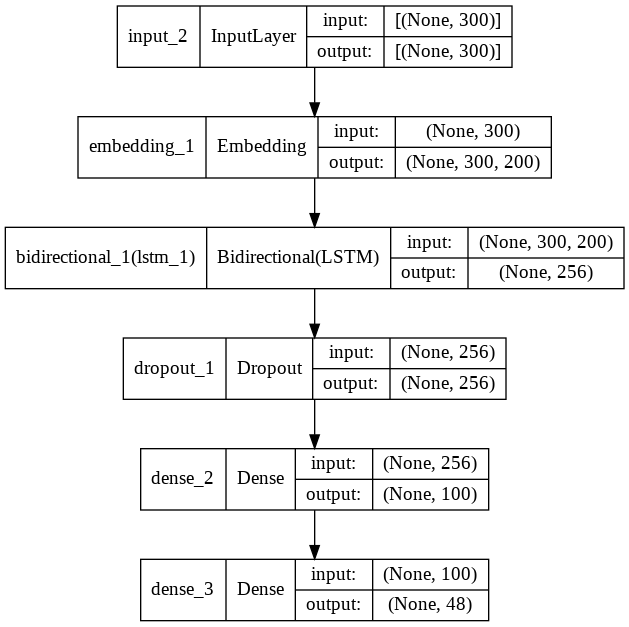

In [48]:
input_layer = Input(shape=(maxlen,),dtype=tf.int64)
embed = Embedding(num_words,output_dim=200,input_length=maxlen,weights=[embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
lstm=Bidirectional(LSTM(128))(embed)
drop=Dropout(0.3)(lstm)
dense =Dense(100,activation='relu')(drop)
out=Dense(num_class,activation='softmax')(dense)

model_td = Model(input_layer,out)
model_td.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model_td.summary()
tf.keras.utils.plot_model(model_td, show_shapes = True)

In [49]:
es = EarlyStopping(monitor='val_accuracy', mode = 'auto', verbose = 1, patience = 5)  
mc = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto')
lr_reduction = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience=2, min_lr=0.0001)

In [50]:
batch_size = 100
epochs = 10
model_td_history = model_td.fit(x_train,ytrain,batch_size=batch_size, epochs=epochs, callbacks=[es,mc,lr_reduction], validation_data = (x_test, ytest),verbose=True)

Epoch 1/10
251/252 [============================>.] - ETA: 0s - loss: 2.4499 - accuracy: 0.3537
Epoch 00001: val_accuracy improved from -inf to 0.64138, saving model to model-001-0.641380.h5
252/252 [==============================] - 21s 67ms/step - loss: 2.4478 - accuracy: 0.3542 - val_loss: 1.2804 - val_accuracy: 0.6414 - lr: 0.0010
Epoch 2/10
251/252 [============================>.] - ETA: 0s - loss: 0.9075 - accuracy: 0.7445
Epoch 00002: val_accuracy improved from 0.64138 to 0.83906, saving model to model-002-0.839059.h5
252/252 [==============================] - 16s 63ms/step - loss: 0.9066 - accuracy: 0.7447 - val_loss: 0.5817 - val_accuracy: 0.8391 - lr: 0.0010
Epoch 3/10
251/252 [============================>.] - ETA: 0s - loss: 0.4912 - accuracy: 0.8575
Epoch 00003: val_accuracy improved from 0.83906 to 0.89138, saving model to model-003-0.891380.h5
252/252 [==============================] - 16s 64ms/step - loss: 0.4916 - accuracy: 0.8576 - val_loss: 0.3799 - val_accuracy: 0.8

In [51]:
# Evaluate the model & report accuracy
from keras.models import load_model
model_td_saved = load_model("model-009-0.935274.h5")
scores = model_td_saved.evaluate(x_test, ytest, batch_size = 100, verbose = 1)
print('Test accuracy: %.2f%%' % (scores[1]*100))

63/63 [==============================] - 2s 23ms/step - loss: 0.2342 - accuracy: 0.9353
Test accuracy: 93.53%


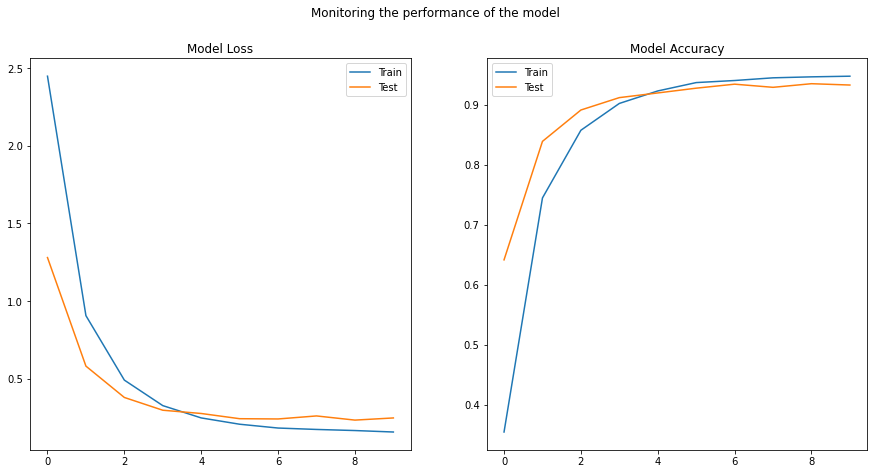

In [52]:
#visualizing model performance  - loss and accuracy 
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))
f.suptitle('Monitoring the performance of the model')

ax1.plot(model_td_history.history['loss'], label = 'Train')
ax1.plot(model_td_history.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(model_td_history.history['accuracy'], label = 'Train')
ax2.plot(model_td_history.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

#### Trying ML Models with Upsampling

In [53]:
# Load the dataset 
#dataset2_DL = df_DL[df_DL['pred_group'].isna()]
dataset2_ML = pd.read_excel('/content/sample_data/df_ML_Aug.xlsx')

In [54]:
dataset2_ML.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,New Assignment Group,combined_description,pred_group,Language
0,0,login issue,verified user details. employee and manager na...,spxjnwir pjlcoqds,GRP_0,GRP_0,login issue verify user detail employee manage...,NaN,en
1,1,outlook,team my meetings/skype meetings etc are not ap...,hmjdrvpb komuaywn,GRP_0,GRP_0,outlook team meeting / skype meeting etc appea...,NaN,en
2,2,cant log in to vpn,hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,GRP_0,can not log vpn hi can not log vpn best,NaN,en
3,3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,GRP_0,unable access hr tool page unable access hr to...,NaN,en
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,GRP_0,skype error skype error,NaN,no


In [55]:
dataset2_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            7860 non-null   int64  
 1   Short description     7860 non-null   object 
 2   Description           7860 non-null   object 
 3   Caller                7860 non-null   object 
 4   Assignment group      7860 non-null   object 
 5   New Assignment Group  7860 non-null   object 
 6   combined_description  7859 non-null   object 
 7   pred_group            0 non-null      float64
 8   Language              7860 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 552.8+ KB


In [56]:
dataset2_ML = dataset2_ML[dataset2_ML['pred_group'].isna()]

In [57]:
dataset2_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7860 entries, 0 to 7859
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            7860 non-null   int64  
 1   Short description     7860 non-null   object 
 2   Description           7860 non-null   object 
 3   Caller                7860 non-null   object 
 4   Assignment group      7860 non-null   object 
 5   New Assignment Group  7860 non-null   object 
 6   combined_description  7859 non-null   object 
 7   pred_group            0 non-null      float64
 8   Language              7860 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 614.1+ KB


In [59]:
dataset2_ML.shape

(7860, 9)

In [60]:
dataset2_ML=dataset2_ML.drop(columns=['Unnamed: 0'],axis=1)

In [61]:
dataset2_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7860 entries, 0 to 7859
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     7860 non-null   object 
 1   Description           7860 non-null   object 
 2   Caller                7860 non-null   object 
 3   Assignment group      7860 non-null   object 
 4   New Assignment Group  7860 non-null   object 
 5   combined_description  7859 non-null   object 
 6   pred_group            0 non-null      float64
 7   Language              7860 non-null   object 
dtypes: float64(1), object(7)
memory usage: 552.7+ KB


In [62]:
#creating copy of dataset for upsampling process
dataset2_ML_US=dataset2_ML.copy()

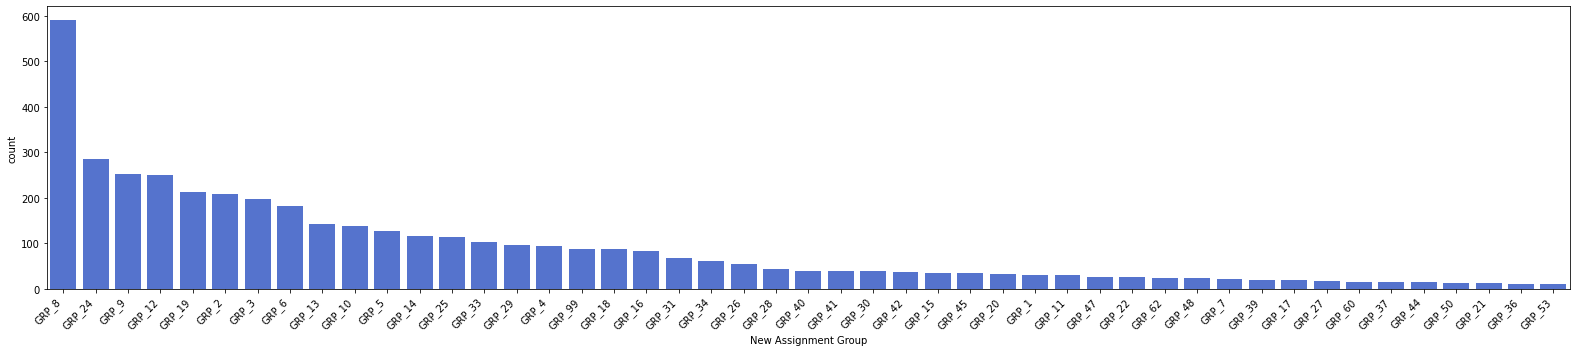

In [64]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
dataset2_ML_nogrp0 = dataset2_ML_US[dataset2_ML_US['New Assignment Group'] != 'GRP_0']

descending_order = dataset2_ML_nogrp0['New Assignment Group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='New Assignment Group', data=dataset2_ML_nogrp0, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [65]:
maxcount = dataset2_ML_nogrp0['New Assignment Group'].value_counts().max()
maxcount

591

In [66]:
dataset2_ML_grp0 = dataset2_ML_US[dataset2_ML_US['New Assignment Group'] == 'GRP_0']

In [67]:
dataset2_ML_grp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3660 entries, 0 to 7857
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     3660 non-null   object 
 1   Description           3660 non-null   object 
 2   Caller                3660 non-null   object 
 3   Assignment group      3660 non-null   object 
 4   New Assignment Group  3660 non-null   object 
 5   combined_description  3659 non-null   object 
 6   pred_group            0 non-null      float64
 7   Language              3660 non-null   object 
dtypes: float64(1), object(7)
memory usage: 257.3+ KB


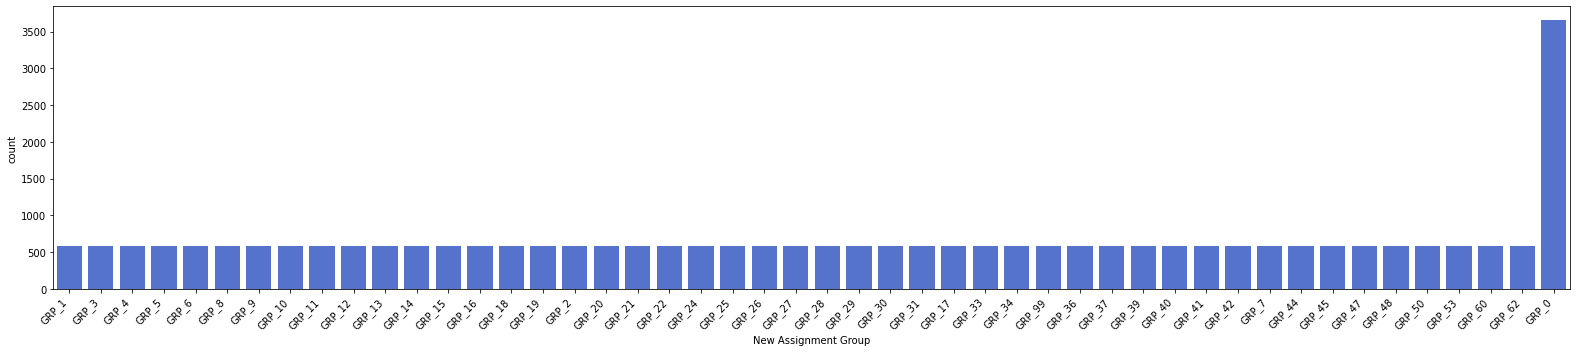

In [68]:
# Treat the imbalance in the dataset by resampling to 591

dataset2_ML_nogrp0_upsampled = dataset2_ML_nogrp0[0:0]
for grp in dataset2_ML_nogrp0['New Assignment Group'].unique():
    dataset2_ML_nogrp0_grp = dataset2_ML_nogrp0[dataset2_ML_nogrp0['New Assignment Group'] == grp]
    resampled = resample(dataset2_ML_nogrp0_grp, replace=True, n_samples=int(maxcount), random_state=123)
    dataset2_ML_nogrp0_upsampled = dataset2_ML_nogrp0_upsampled.append(resampled)

dataset2_ML_upsampled=pd.concat([dataset2_ML_nogrp0_upsampled, dataset2_ML_grp0],ignore_index=True)
descending_order = dataset2_ML_upsampled['New Assignment Group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='New Assignment Group', data=dataset2_ML_upsampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [69]:
# Create a column for target (assignment group) variable
dataset2_ML_upsampled['group'] = dataset2_ML_upsampled['New Assignment Group'].str[4:]
#from sklearn. preprocessing import LabelEncoder
#le = LabelEncoder()
#dataset2['group'] = le. fit_transform(dataset2['group'])
dataset2_ML_upsampled['group'] = dataset2_ML_upsampled['group'].astype('int8')
dataset2_ML_upsampled['target'] = dataset2_ML_upsampled['group'].astype('category').cat.codes

dataset2_ML_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31437 entries, 0 to 31436
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     31437 non-null  object 
 1   Description           31437 non-null  object 
 2   Caller                31437 non-null  object 
 3   Assignment group      31437 non-null  object 
 4   New Assignment Group  31437 non-null  object 
 5   combined_description  31436 non-null  object 
 6   pred_group            0 non-null      float64
 7   Language              31437 non-null  object 
 8   group                 31437 non-null  int8   
 9   target                31437 non-null  int8   
dtypes: float64(1), int8(2), object(7)
memory usage: 2.0+ MB


In [71]:
dataset2_ML_upsampled.groupby(["group", "target"]).size()

group  target
0      0         3660
1      1          591
2      2          591
3      3          591
4      4          591
5      5          591
6      6          591
7      7          591
8      8          591
9      9          591
10     10         591
11     11         591
12     12         591
13     13         591
14     14         591
15     15         591
16     16         591
17     17         591
18     18         591
19     19         591
20     20         591
21     21         591
22     22         591
24     23         591
25     24         591
26     25         591
27     26         591
28     27         591
29     28         591
30     29         591
31     30         591
33     31         591
34     32         591
36     33         591
37     34         591
39     35         591
40     36         591
41     37         591
42     38         591
44     39         591
45     40         591
47     41         591
48     42         591
50     43         591
53     44         